In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

import glob
import time
import sklearn.svm as svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from skimage.feature import hog
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV




In [91]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# class save_images ( object ):
#     def __init__( self ):
#         self.i = 0
#     def __call__( self, image):
#         # do somethingc
#         self.i +=1
#         cv2.imwrite("test_images_project/image" + str(self.i) + ".jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
#         return image
    
# save_images = save_images()    
    
# ## creating additional test images
# from moviepy.editor import VideoFileClip
# output_video_name = 'test_video_output.mp4'
# clip1 = VideoFileClip("project_video.mp4")
# clip2 = clip1.subclip(0,15)
# output_video = clip2.fl_image(lambda x:save_images(x)) #NOTE: this function expects color images!!
# %time output_video.write_videofile(output_video_name, audio=False)
# import os
# os.remove('test_video_output.mp4')
# print ("Completed")


### Create a mask

In [92]:
def region_of_interest(img):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    vertices = np.array([[(0,       img.shape[0] ),                    # <-- bottom left
                          (0,       img.shape[0]*.9 ),                    # <-- bottom left
                          (.55*img.shape[1] ,  .5*img.shape[0]),                    # <-- top left
                          (.8*img.shape[1],   .5*img.shape[0]),                    # <-- top right
                          (img.shape[1],      img.shape[0]*.5),
                          (img.shape[1],      img.shape[0]) 
                         ]], dtype=np.int32)  # <-- bottom right
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    
    masked_image[masked_image ==0 ] = 0
    return masked_image

### CHECK IF A POINT ( USED FOR THE CAR BOXES ) IS INSIDE THE AREA OF INTERESTS

In [17]:
img = cv2.imread("test_images/test1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title("Original ")
ax1.axis('off')

ax2.imshow(region_of_interest(img))
ax2.set_title("Masked " )
ax2.axis('off')

vertices = np.array([[(0,       img.shape[0] ),                    # <-- bottom left
                      (0,       img.shape[0]*.9 ),                    # <-- bottom left
                      (.55*img.shape[1] ,  .5*img.shape[0]),                    # <-- top left
                      (.8*img.shape[1],   .5*img.shape[0]),                    # <-- top right
                      (img.shape[1],      img.shape[0]*.5),
                      (img.shape[1],      img.shape[0]) 
                     ]], dtype=np.int32)  # <-- bottom right


def check_if_point_inside(y_pos, x_pos, img, mask):
    ## inverting because the function cv2.check_if_point_inside uses the cartesian coordinates
    y = img.shape[0] -  y_pos
    x = img.shape[1] -  x_pos
#     print ( " x = {}, y = {}".format(x,y))
    check_result = cv2.pointPolygonTest(mask, (x,y),False)
#     print ( check_result)
    if check_result == -1:
        return True
    else: 
        return False
    
    return True

# print(vertices)
x_pos = 100 
y_pos = 720
if check_if_point_inside (img=img, x_pos = x_pos , y_pos= y_pos , mask=vertices) == True :
   print ( " point with coordinates (y_pos = {},x_pos = {} ) is INSIDE AREA OF INTEREST".format(y_pos, x_pos))
else:
   print ( " point with coordinates (y_pos = {},x_pos = {} ) is OUTSIDE area of interest".format(y_pos, x_pos))


x_pos = 100 
y_pos = 0
if check_if_point_inside (img=img, x_pos = x_pos , y_pos= y_pos , mask=vertices) == True :
   print ( " point with coordinates (y_pos = {},x_pos = {} ) is INSIDE AREA OF INTEREST".format(y_pos, x_pos))
else:
   print ( " point with coordinates (y_pos = {},x_pos = {} ) is OUTSIDE area of interest".format(y_pos, x_pos))
   

 point with coordinates (y_pos = 720,x_pos = 100 ) is INSIDE AREA OF INTEREST
 point with coordinates (y_pos = 0,x_pos = 100 ) is OUTSIDE area of interest


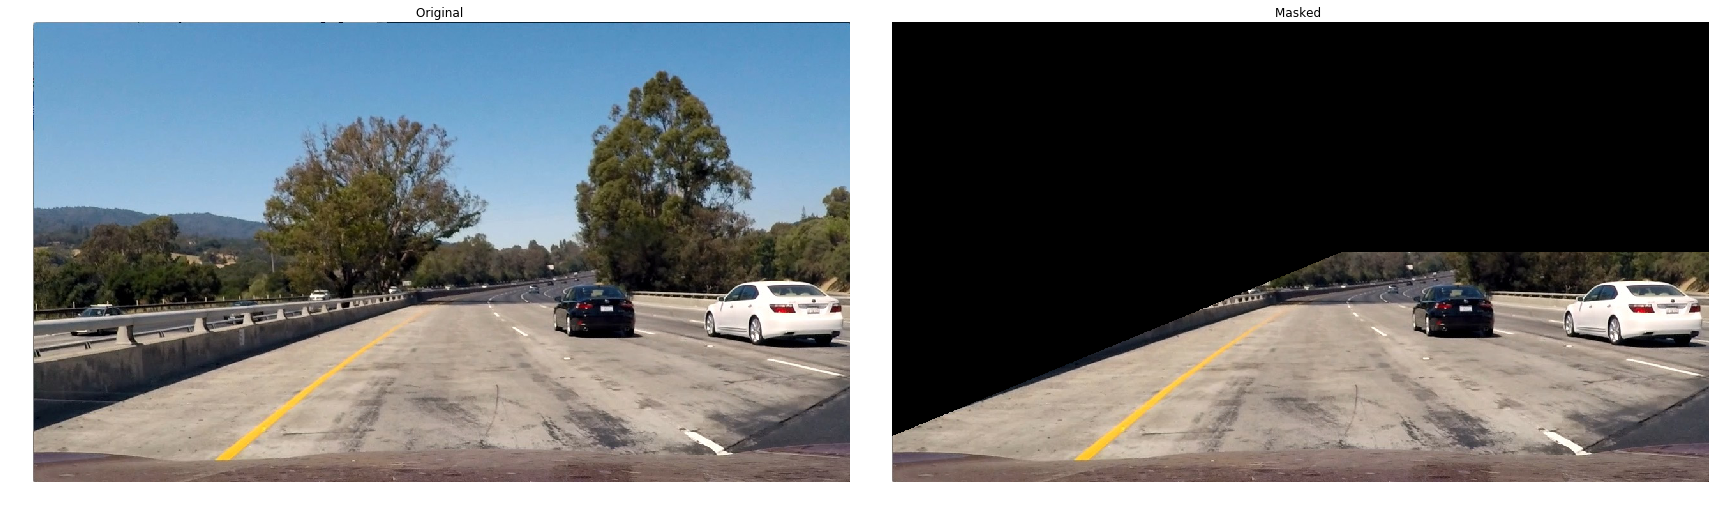

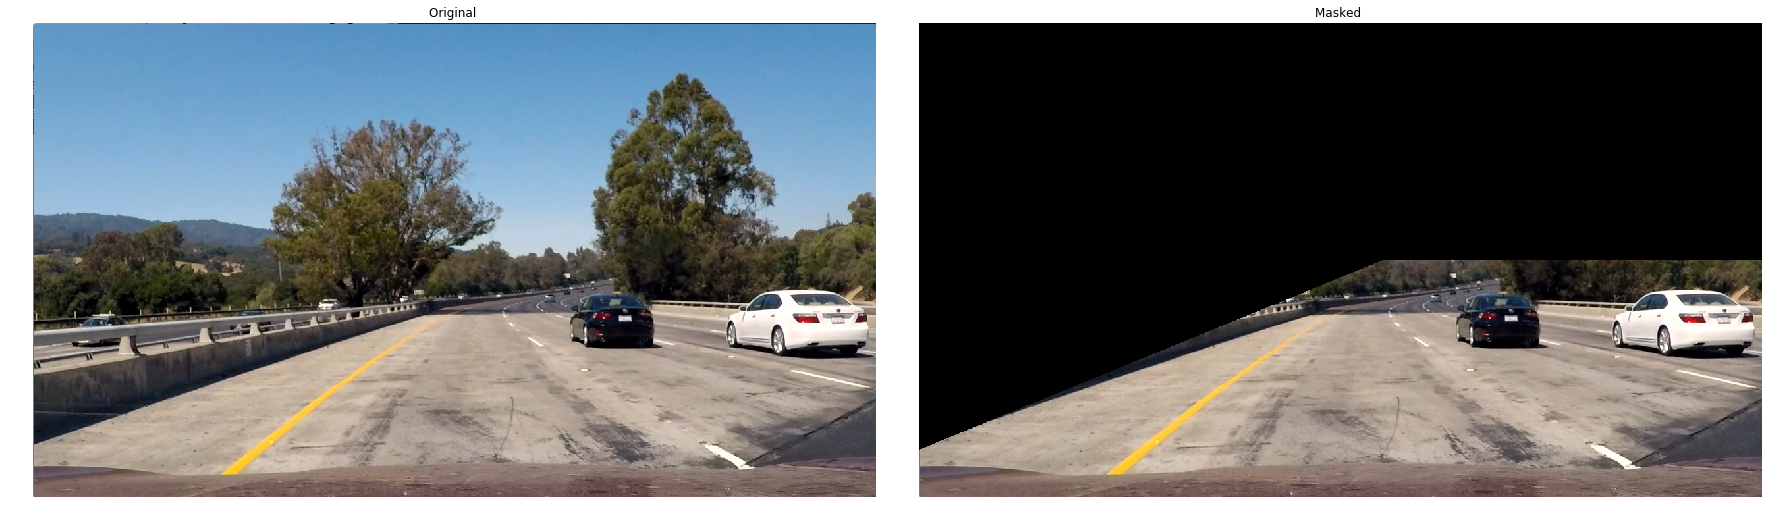

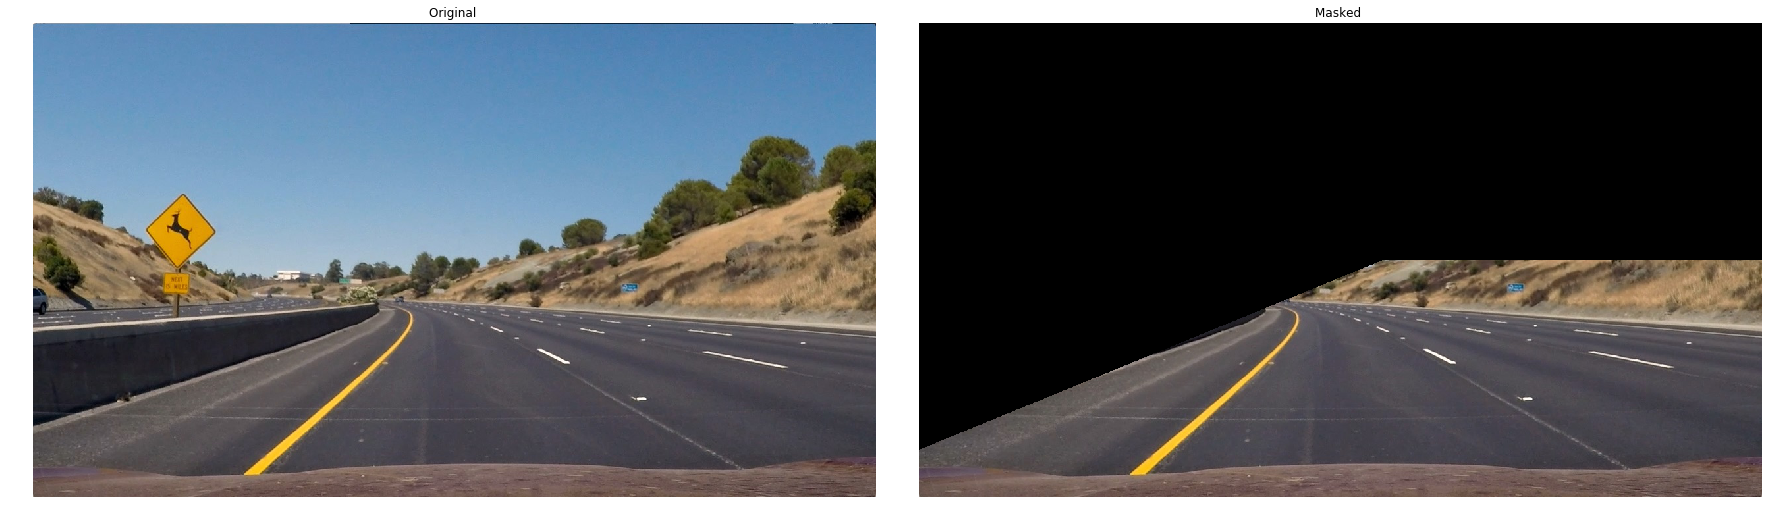

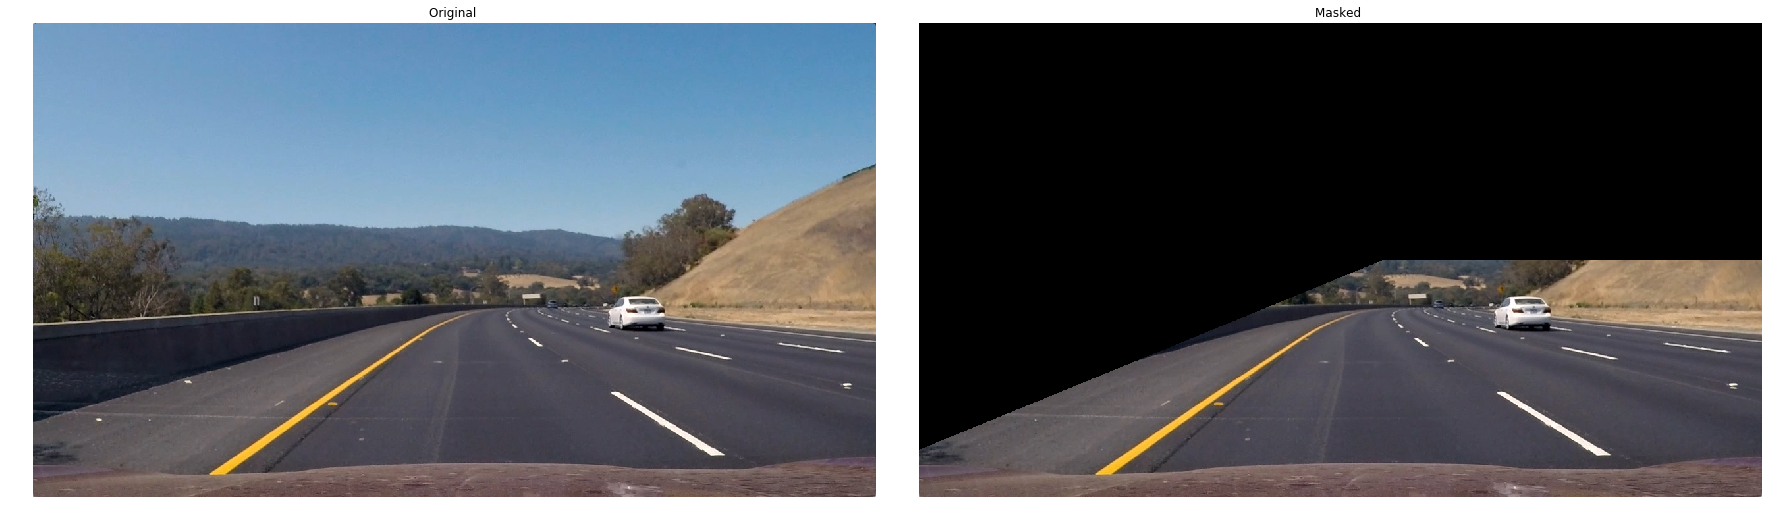

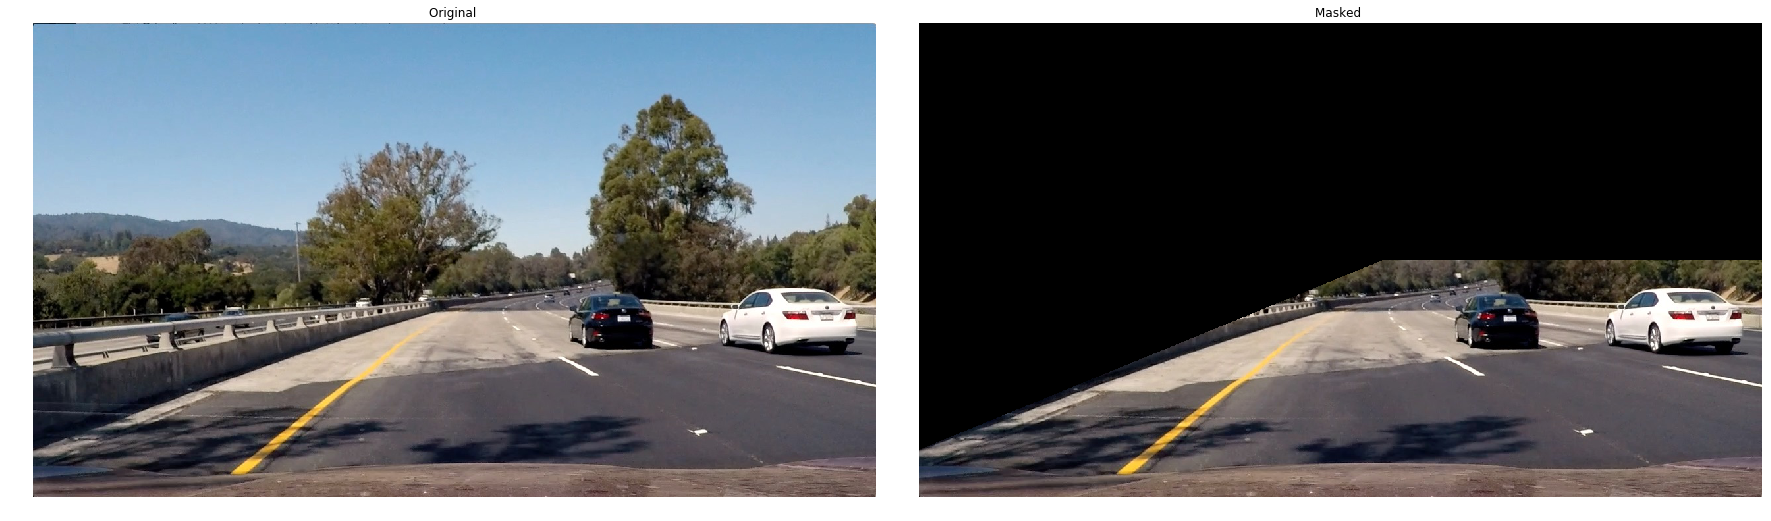

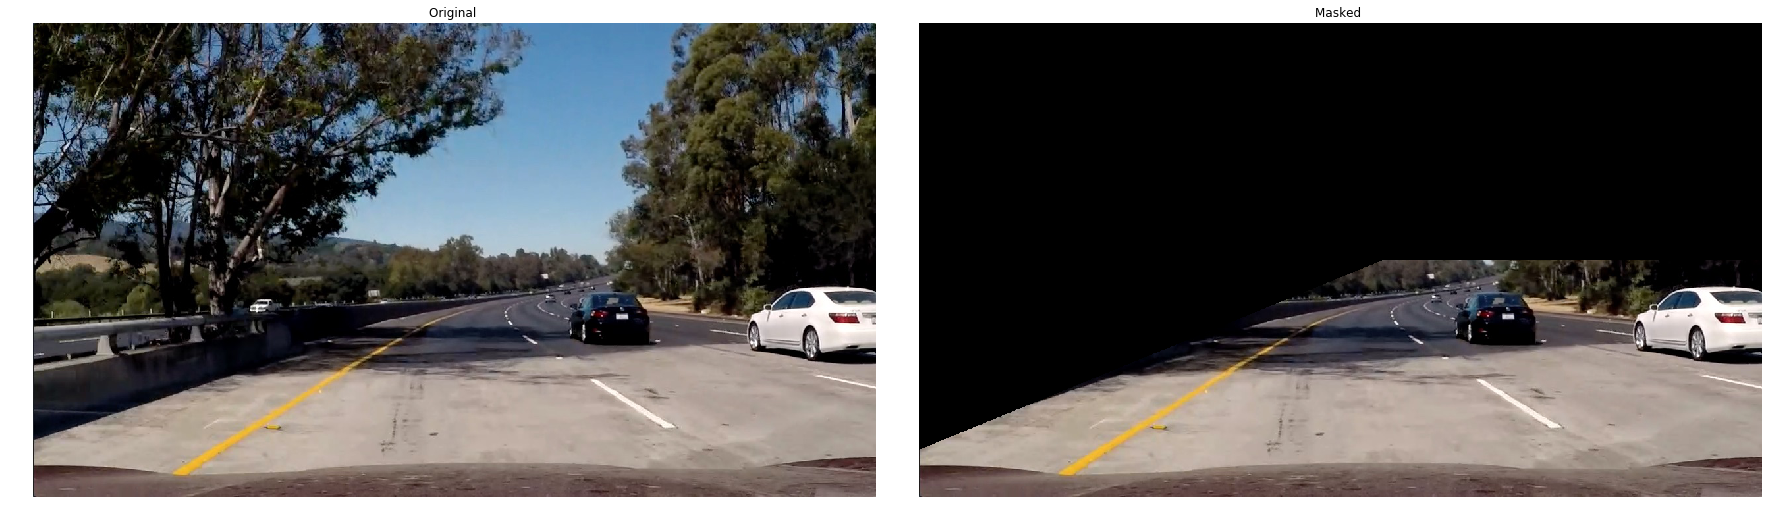

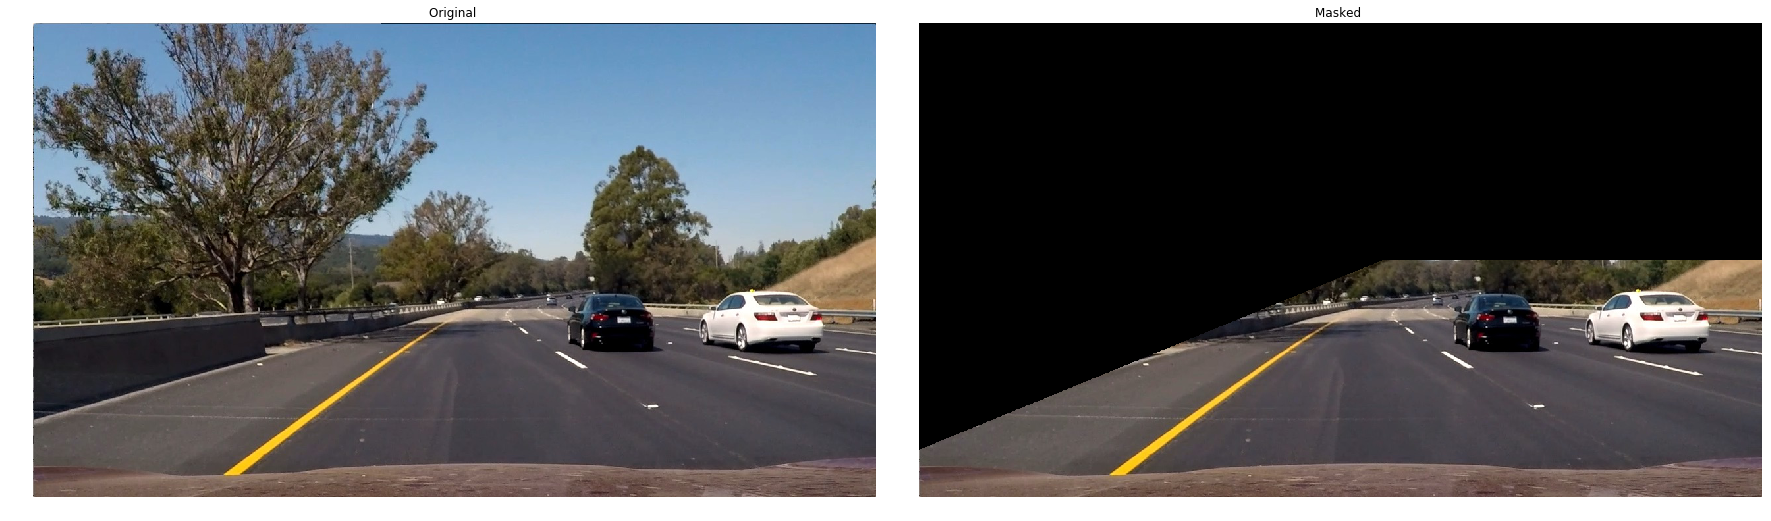

In [18]:
for image_name  in  sorted(glob.glob('test_images/*')):
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(image)
    ax1.set_title("Original ")
    ax1.axis('off')

    ax2.imshow(region_of_interest(image))
    ax2.set_title("Masked " )
    ax2.axis('off')

    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()


### region of interests on the entire video

In [19]:
from moviepy.editor import VideoFileClip
output_video_name = 'project_video_output_masked.mp4'
clip1 = VideoFileClip("project_video.mp4")
output_video = clip1.fl_image(lambda x: region_of_interest(x)) #NOTE: this function expects color images!!
%time output_video.write_videofile(output_video_name, audio=False,verbose=False)
print ("Completed")

100%|█████████▉| 1260/1261 [00:41<00:00, 30.32it/s]


CPU times: user 9.33 s, sys: 4.35 s, total: 13.7 s
Wall time: 42.6 s
Completed


## image_features_extractor

In [39]:
class image_features_extractor:
    def __init__(self    \
        ,color_space           # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
        ,orient                # HOG orientations 
        ,pix_per_cell          # HOG pixels per cell 
        ,cell_per_block        # HOG cells per block 
        ,spatial_size          # Spatial binning dimensions
        ,spatial_feat          # Spatial features on or off
        ,hist_feat             # Histogram features on or off
        ,hog_feat              # HOG features on or off
        ,nbins                 # Number of color histogram bins
        ,bins_range
        ,image_size
        ,debug=False
                ):

        self.color_space = color_space
        self.orient = orient
        self.pix_per_cell = pix_per_cell
        self.cell_per_block = cell_per_block
        self.spatial_size = spatial_size
        self.spatial_feat = spatial_feat
        self.hist_feat = hist_feat
        self.hog_feat = hog_feat
        self.nbins=nbins
        self.bins_range=bins_range
        self.debug =debug
        self.image_size = image_size

    # Define a function to compute binned color features  
    def bin_spatial(self,feature_image):
        # Use cv2.resize().ravel() to create the feature vector
        features = cv2.resize(feature_image, self.spatial_size).ravel() 
        # Return the feature vector
        return features

    # Define a function to compute color histogram features  
    def color_hist(self,feature_image):
        # Compute the histogram of the color channels separately
        channel1_hist = np.histogram(feature_image[:,:,0], bins=self.nbins, range=self.bins_range)
        channel2_hist = np.histogram(feature_image[:,:,1], bins=self.nbins, range=self.bins_range)
        channel3_hist = np.histogram(feature_image[:,:,2], bins=self.nbins, range=self.bins_range)
        # Concatenate the histograms into a single feature vector
        self.hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
#         hist_features = channel1_hist[0]

        if self.debug:
            # Generating bin centers
            bin_edges = channel1_hist[1]
            bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
            # Plot a figure with all three bar charts
            fig = plt.figure(figsize=(12,3))
            plt.subplot(131)
            plt.bar(bin_centers, channel1_hist[0])
            plt.xlim(0, 256)
            plt.title('Channel 0 Histogram')
            plt.subplot(132)
            plt.bar(bin_centers, channel2_hist[0])
            plt.xlim(0, 256)
            plt.title('Channel 1 Histogram')
            plt.subplot(133)
            plt.bar(bin_centers, channel3_hist[0])
            plt.xlim(0, 256)
            plt.title('Channel 2 Histogram')
            plt.show()

       
        # Return the individual histograms, bin_centers and feature vector
        return self.hist_features

    def get_hog_features(self, feature_image):
        if self.debug:
            # feature_image is 1 channel image
            hog_features ,hog_image    = hog(feature_image, 
                                  orientations=self.orient, 
                                  pixels_per_cell=(self.pix_per_cell, self.pix_per_cell),
                                  cells_per_block=(self.cell_per_block, self.cell_per_block), 
                                  block_norm='L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=True, feature_vector=True)
            return hog_features, hog_image

        
        else:
            # feature_image is 1 channel image
            hog_features     = hog(feature_image, 
                                  orientations=self.orient, 
                                  pixels_per_cell=(self.pix_per_cell, self.pix_per_cell),
                                  cells_per_block=(self.cell_per_block, self.cell_per_block), 
                                  block_norm='L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=False, feature_vector=True)
            return hog_features



    def get_all_features (self, img):
        if self.debug:
            print( "get_all_features image shape "+ str(img.shape))
        if self.color_space != 'RGB':
            if self.color_space == 'HSV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif self.color_space == 'LUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif self.color_space == 'HLS':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif self.color_space == 'YUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
            elif self.color_space == 'YCrCb':
#                 print (" Color space YCrCb ")
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        else: 
            feature_image = np.copy(img)
            
        
        if feature_image.shape[0] == self.image_size[0] and\
           feature_image.shape[1] == self.image_size[1]:
            pass #print (" feature_image.shape == self.image_size")
        else:
             print (" feature_image.shape = " + str(feature_image.shape))
             print (" self.image_size = "     + str(self.image_size))
             feature_image = cv2.resize(feature_image, self.image_size)    
                
        if self.debug:
            f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 9))
            f.tight_layout()
            

            ax1.imshow(feature_image[:,:,0],cmap="gray")
            ax1.set_title("Image in format " + self.color_space + " channel 0 ")
            ax1.axis('off')
            
            ax2.imshow(feature_image[:,:,1],cmap="gray")
            ax2.set_title("Image in format " + self.color_space+ " channel 1 ")
            ax2.axis('off')

            ax3.imshow(feature_image[:,:,2],cmap="gray")
            ax3.set_title("Image in format " + self.color_space+ " channel 2 ")
            ax3.axis('off')

            plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
            plt.show()


            
        img_features = []

        if self.spatial_feat == True:
            img_features.append(self.bin_spatial(feature_image))

        if self.hist_feat == True:
            img_features.append(self.color_hist(feature_image))
            
        if self.hog_feat == True:
#             gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#             hog_features = self.get_hog_features(gray_image)
            hog_features = []
            if self.debug:
                f, axarr = plt.subplots(1, 3, figsize=(24, 9))
                f.tight_layout()
            
            for channel in range(feature_image.shape[2]):
                if self.debug:
                    temp, hog_image = self.get_hog_features(feature_image[:,:,channel])
                    
                    axarr[channel].imshow(hog_image,cmap="gray")
                    axarr[channel].set_title("Image in format " + self.color_space + " channel 0 ")
                    axarr[channel].axis('off')

                else:
                    temp = self.get_hog_features(feature_image[:,:,channel])
                    
                hog_features.extend(temp)      
                
            img_features.append(hog_features)
            
            if self.debug:
                plt.show()


            
        #9) Return concatenated array of features
    #     print (img_features)
        return np.concatenate(img_features)                
    

### Car Detector from images ( train & prediction )

In [65]:
class image_car_detector:
    def __init__(self, extractor, 
                 cars_folder='train_data/car', 
                 notcars_folder='train_data/non-car',
                 limit_images=None):
        self.cars_folder    = cars_folder
        self.notcars_folder = notcars_folder

        self.car_images_list     = []
        self.notcars_images_list = []
        self.extractor = extractor
        
        self.car_features = []
        self.notcar_features = []
        self.limit_images = limit_images

        
    def load_images_list(self):
        self.car_images_list     = []
        self.notcars_images_list = []
    
        # loading cars
        for subfolder in glob.glob(self.cars_folder + '/*'):
          print ("subfolder = " + subfolder)
          for image  in  glob.glob(subfolder+'/*'):
               self.car_images_list.append(image)

        # loading non cars
        for subfolder in glob.glob(self.notcars_folder+ '/*'):
          for image  in  glob.glob(subfolder+'/*'):
               self.notcars_images_list.append(image)
    
    # Define a function to extract features from a list of images
    # Have this function call bin_spatial() and color_hist()
    def extract_imgs_features(self):
        # Iterate through the list of images
        if self.limit_images:
            x_limit = self.limit_images
            print (" limiting the number of images to " + str(x_limit))
        else:
            x_limit = len(self.car_images_list)
            print (" processing " + str(x_limit) +" images "  )

#         x_limit = 100
        print ( " ")
        print (" Extracting features from cars ....")
        # CARS FEATURES 
        self.car_features = []


        for file in self.car_images_list[:x_limit]:
            image = cv2.imread(file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            temp_features = self.extractor.get_all_features(image)
#             print ( " features length = " + str(len(temp_features)))
            self.car_features.append(temp_features)
            
        print (" .. completed ( features per image = " + str(len(self.car_features[0])) + ")")

            
        print ( " ")
        print (" Extracting features from non cars ....")
        # NOT CAR FEATURES 
        self.notcar_features = []
        # Iterate through the list of images
        for file in self.notcars_images_list[:x_limit]:
            image = cv2.imread(file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            temp_features = self.extractor.get_all_features(image)
#             print ( " features length = " + str(len(temp_features)))
            self.notcar_features.append(temp_features)
        print (" .. completed ( features per image = " + str(len(self.notcar_features[0])) + ")")

        print (" ")

        
  


    def search_windows(self, img, windows, cars_classifier):
        self.on_windows = []
        for window in windows:
            #3) Extract the test window from original image
            ###[startx, starty, endx, endy]
            check = check_if_point_inside (img=img, 
                                           x_pos = window[0] ,    # --> x1 position 
                                           y_pos=  window[1] ,    # --> y1 position 
                                           mask=vertices) == True

            if check == True:
                    test_img = img[window[1]:window[3], window[0]:window[2]]
                    test_img = cv2.resize(test_img, (64,64))

                    if cars_classifier.type == "CNN":
                        prediction = cars_classifier.predict(test_img)

                    else:
                        #4) Extract features for that window using single_img_features()
                        features = self.extractor.get_all_features(test_img)
                        features_reshaped = np.array(features).reshape(1, -1)
                        #5) Scale extracted features to be fed to classifier
                        test_features = cars_classifier.X_scaler.transform(np.array(features).reshape(1, -1))
                        #6) Predict using your classifier
                        prediction = cars_classifier.predict(test_features)

                    #7) If positive (prediction == 1) then save the window
                    if prediction == "car":
                        self.on_windows.append(window)
            else:
                    print ( "search_windows : window is outside area of interests")
                
        return self.on_windows

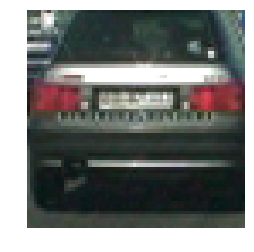

get_all_features image shape (64, 64, 3)


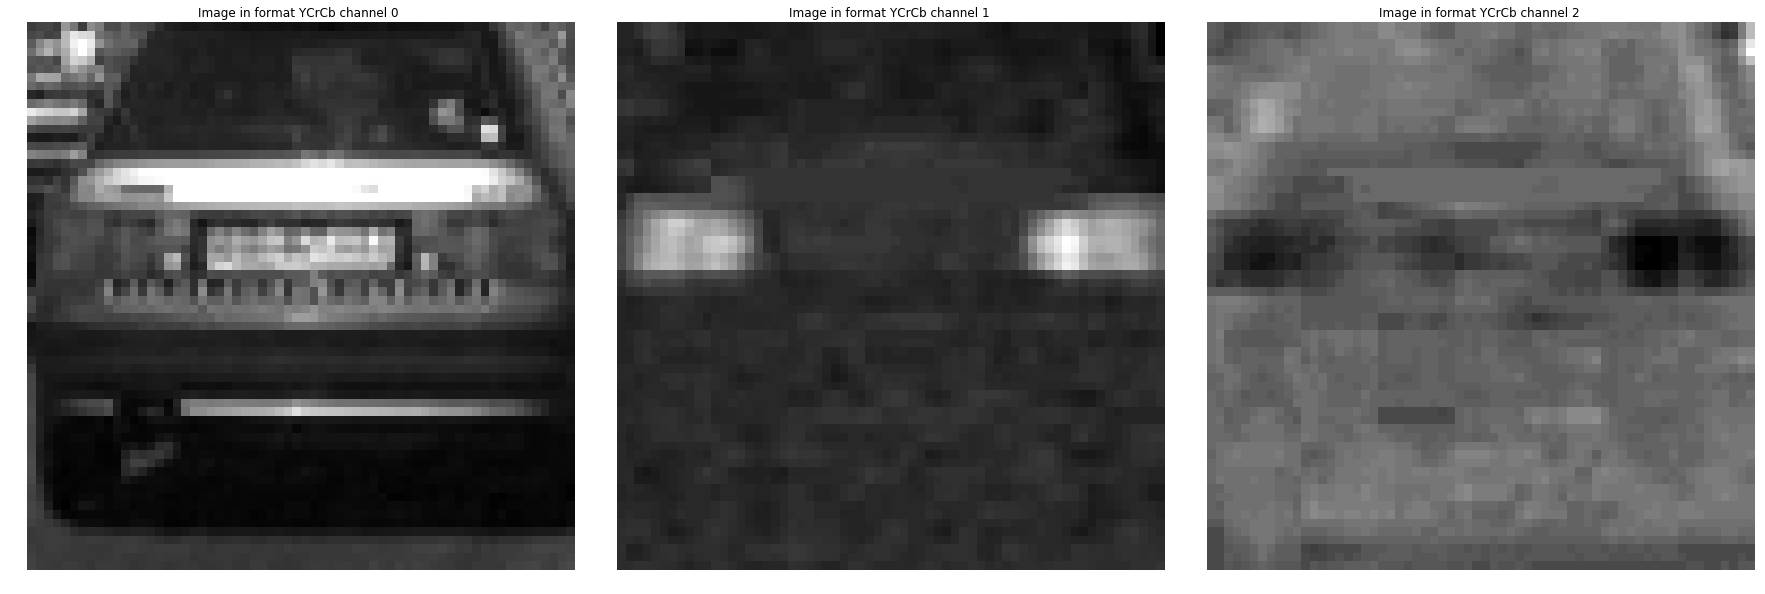

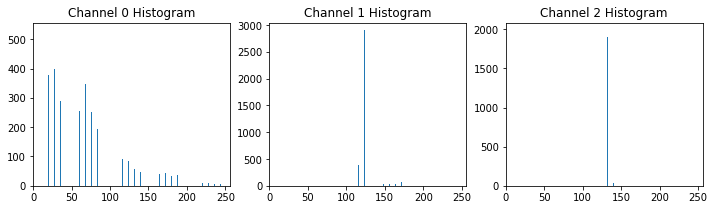

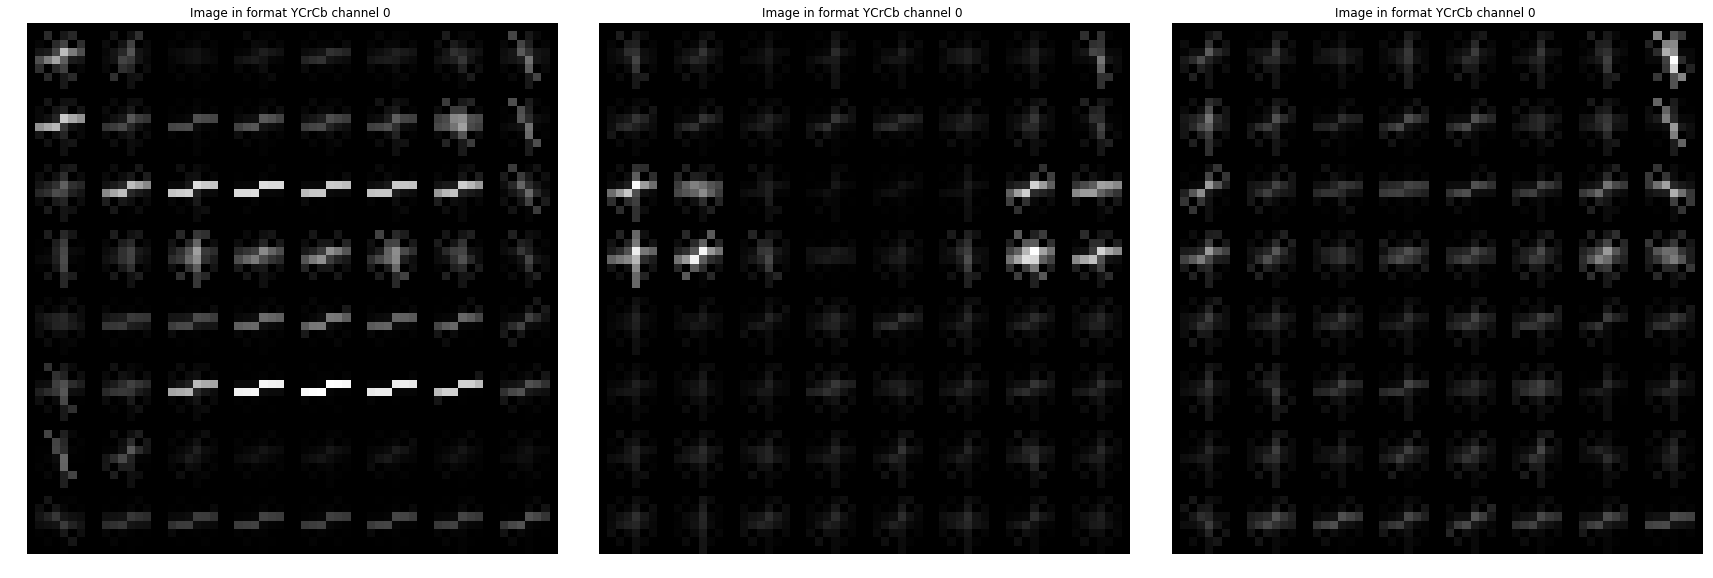

(8460,)

In [66]:
import cv2
image = cv2.imread('train_data/car/GTI_MiddleClose/image0110.png')
image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# color space = RGB, HSV, LUV, HLS, YUV, YCrCb
extractor = image_features_extractor(color_space= 'YCrCb' #'YCrCb'
                                    ,pix_per_cell=8
                                    ,cell_per_block=2
                                     
                                    ,orient=9
                                    ,spatial_feat = True     # Spatial features on or off
                                    ,hist_feat = True        # Histogram features on or off
                                    ,hog_feat = True  
                                    ,spatial_size = (32, 32)
                                    ,bins_range=(0, 256)
                                    ,nbins=32
                                    , debug=True
                                    , image_size = (64,64)  
                                    )
plt.imshow(image)
plt.axis("off")
plt.show()

all_features = extractor.get_all_features(image)
all_features.shape


### Defining the classifier HOG + Neural Network

In [86]:
class classifier_hog_nn:
    def __init__(self, car_features, notcar_features):
        self.car_features = car_features
        self.notcar_features = notcar_features
        self.type="HOG+NEURAL"
                 
    def train(self, parameters=[1, 10], epochs=20,batch_size = 32,verbose =False):
        
        X = np.vstack((self.car_features, self.notcar_features)).astype(np.float64)                        

        print (".....Scaling...")
        # Fit a per-column scaler
        self.X_scaler = StandardScaler().fit(X)
        
        # Apply the scaler to X
        scaled_X = self.X_scaler.transform(X)
        print (scaled_X)
        
        y = np.hstack((np.ones(len(self.car_features)), np.zeros(len(self.notcar_features))))

        from sklearn.model_selection import train_test_split

        # Split up data into randomized training and test sets
        rand_state = np.random.randint(0, 100)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            scaled_X, y, test_size=0.1, random_state=rand_state)

        #################
        # #### START TRAINING 
        #################

        import time

        print ( "Start training ... ")
        t=time.time()
        from keras.models import Sequential
        from keras.layers import Dense, Dropout
        from keras.utils import to_categorical
        
        self.clf = Sequential()
        
        self.clf.add(Dense(64, input_shape=(len(self.car_features[0]),), name="dense1"))
        self.clf.add(Dense(128, activation='relu', name="dense2"))
        self.clf.add(Dropout(0.2))
        self.clf.add(Dense(1, activation='sigmoid', name="final"))
        
        self.clf.compile('adam', 'binary_crossentropy', ['accuracy'])

            
        history = self.clf.fit(self.X_train, self.y_train,
                    batch_size=batch_size,
                    epochs = epochs,
                    verbose=verbose,
                    shuffle=True,
                    validation_split=0.1,           
                    )
                  
        t2 = time.time()
        print(round(t2-t, 2), 'Seconds to train the classifier...')

        # Check the score of the SVC
        score = self.clf.evaluate(self.X_test, self.y_test)

#         print('Test Accuracy of SVC = ', round(self.clf.score(X_test, y_test), 4))
        print( " ")
        print('Test Accuracy of classifier = ' + str(score[1]))

    def predict(self, features):
        prediction = self.clf.predict(features).squeeze()
        if prediction >  0.9:
#         if prediction ==   1:
            return "car"
        else:
            return "non-car"
        
        
    
    def save_classifier(self):
        self.clf.save("keras_model.h5")
        
        import pickle
#         # save the classifier
#         with open('car_detection_classifier.pkl', 'wb') as fid:
#             pickle.dump(self.clf, fid) 
            
        with open('X_scaler.pkl', 'wb') as fid:
            pickle.dump(self.X_scaler, fid) 
        print (" .. classifier saved ")    

    def load_classifier(self):
        import pickle
        # save the classifier
#         with open('car_detection_classifier.pkl', 'rb') as fid:
#             self.clf = pickle.load(fid)
        from keras.models import load_model
        self.clf = load_model("keras_model.h5")
        
        with open('X_scaler.pkl', 'rb') as fid:
            self.X_scaler = pickle.load(fid)

        print (" .. classifier loaded ")  

### Features extraction and Classifier training

In [68]:
extractor.debug = False

detector = image_car_detector(extractor) #, limit_images= 2000)

# detector.load_images_list()

# detector.extract_imgs_features()


In [69]:
cars_classifier_hog_nn = classifier_hog_nn(detector.car_features, detector.notcar_features)
# cars_classifier_hog_nn.train(epochs=10,batch_size=32, verbose=True)

# cars_classifier_hog_nn.save_classifier()
cars_classifier_hog_nn.load_classifier()

 .. classifier loaded 


### TESTING NEURAL NETWORK CLASSIFIER

In [70]:
# import cv2

# print ( "*************************************************************")        
# print ( "** TESTING NEURAL NETWORK CLASSIFIER .....") 
# print ( "*************************************************************")        


# def classify(file):
#     image = cv2.imread(file)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     temp_features = extractor.get_all_features(image)
#     # Scale extracted features to be fed to classifier
#     temp_features = cars_classifier_hog_nn.X_scaler.transform(np.array(temp_features).reshape(1, -1))
#     # Predict using your classifier
#     prediction = cars_classifier_hog_nn.predict(temp_features)
#     return prediction

# corrected_predictions = 0
# wrong_predictions = 0

# ######
# #### cars 
# ######
# print ( " Predicting CARS")
# for folder  in  sorted(glob.glob('train_data/car/*')):
#     print ( " Predicting CARS folder " + str(folder))
#     for file in glob.glob(folder+ "/*"):
#         prediction = classify(file)
#         if prediction == "car":
#             corrected_predictions +=1
#         else:
#             wrong_predictions +=1
#     print ("                                     ..... correct= {} , wrong={} "\
#            .format(corrected_predictions,wrong_predictions ))

# ######
# #### NON cars 
# ######
# print ( " ")
# print ( " Predicting NON CARS")
# for folder  in  sorted(glob.glob('train_data/non-car/*')):
#     print ( " Predicting NON CARS folder " + str(folder))
#     for file in glob.glob(folder + "/*"):
#         prediction = classify(file)
#         if prediction == "non-car":
#             corrected_predictions +=1
#         else:
#             wrong_predictions +=1
#     print ("                                     ..... correct= {} , wrong={} "\
#            .format(corrected_predictions,wrong_predictions ))

# print ( "*************************************************************")        
# print ( "** NEURAL NETWORK CLASSIFIER ..... ")
# print ( "**   Corrected predictions {}".format(corrected_predictions))        
# print ( "**   Wrong     predictions {}".format(wrong_predictions))        
# print ( "*************************************************************")        


### Re-Defining the classifier as Svm


In [88]:
class classifier_svm():
    def __init__(self, car_features, notcar_features):
        self.car_features = car_features
        self.notcar_features = notcar_features
        self.type="SVM"
                 
    def train(self, parameters=[1, 10], epochs=20,batch_size = 32,verbose =False):
        
        X = np.vstack((self.car_features, self.notcar_features)).astype(np.float64)                        

        print (".....Scaling...")
        # Fit a per-column scaler
        self.X_scaler = StandardScaler().fit(X)
        
        # Apply the scaler to X
        scaled_X = self.X_scaler.transform(X)
        y = np.hstack((np.ones(len(self.car_features)), np.zeros(len(self.notcar_features))))

        from sklearn.model_selection import train_test_split

        # Split up data into randomized training and test sets
        rand_state = np.random.randint(0, 100)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            scaled_X, y, test_size=0.1, random_state=rand_state)

        #################
        # #### START TRAINING 
        #################

        import time

        print ( "Start training ... ")
        t=time.time()
        self.clf = svm.LinearSVC()

        self.clf.fit(self.X_train, self.y_train)
        
        
        t2 = time.time()
        print(round(t2-t, 2), 'Seconds to train the classifier...')

        # Check the score of the SVC
        score = self.clf.score(self.X_test, self.y_test)

        print( " ")
        print('Test Accuracy of classifier = ' + str(score))

    def predict(self, features):
        prediction = self.clf.predict(features).squeeze()
        if prediction >  0.9:
#         if prediction ==  1:
            return "car"
        else:
            return "non-car"

    def save_classifier(self):
        
        import pickle
        # save the classifier
        with open('car_detection_classifier.pkl', 'wb') as fid:
            pickle.dump(self.clf, fid) 
            
        with open('X_scaler.pkl', 'wb') as fid:
            pickle.dump(self.X_scaler, fid) 
        print (" .. classifier saved ")    

    def load_classifier(self):
        import pickle
        # save the classifier
        with open('car_detection_classifier.pkl', 'rb') as fid:
            self.clf = pickle.load(fid)
        
        with open('X_scaler.pkl', 'rb') as fid:
            self.X_scaler = pickle.load(fid)

        print (" .. classifier loaded ")  

#### training the SVM classifier


In [89]:
cars_classifier_svm = classifier_svm(detector.car_features, detector.notcar_features)
# cars_classifier_svm.train()

# cars_classifier_svm.save_classifier()
cars_classifier_svm.load_classifier()


 .. classifier loaded 


### TESTING SVM CLASSIFIER

In [90]:
# import cv2

# print ( "*************************************************************")        
# print ( "** TESTING SVM classifier.....") 
# print ( "*************************************************************")        


# def classify(file):
#     image = cv2.imread(file)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     temp_features = extractor.get_all_features(image)
#     # Scale extracted features to be fed to classifier
#     temp_features = cars_classifier_svm.X_scaler.transform(np.array(temp_features).reshape(1, -1))
#     # Predict using your classifier
#     prediction = cars_classifier_svm.predict(temp_features)
#     return prediction

# corrected_predictions = 0
# wrong_predictions = 0

# ######
# #### cars 
# ######
# print ( " Predicting CARS")
# for folder  in  sorted(glob.glob('train_data/car/*')):
#     print ( " Predicting CARS folder " + str(folder))
#     for file in glob.glob(folder+ "/*"):
#         prediction = classify(file)
#         if prediction == "car":
#             corrected_predictions +=1
#         else:
#             wrong_predictions +=1
#     print ("                                     ..... correct= {} , wrong={} "\
#            .format(corrected_predictions,wrong_predictions ))

# ######
# #### NON cars 
# ######
# print ( " ")
# print ( " Predicting NON CARS")
# for folder  in  sorted(glob.glob('train_data/non-car/*')):
#     print ( " Predicting NON CARS folder " + str(folder))
#     for file in glob.glob(folder + "/*"):
#         prediction = classify(file)
#         if prediction == "non-car":
#             corrected_predictions +=1
#         else:
#             wrong_predictions +=1
#     print ("                                     ..... correct= {} , wrong={} "\
#            .format(corrected_predictions,wrong_predictions ))

# print ( "*************************************************************")        
# print ( "** SVM CLASSIFIER ..... ")
# print ( "**    Corrected predictions {}".format(corrected_predictions))        
# print ( "**    Wrong     predictions {}".format(wrong_predictions))        
# print ( "*************************************************************")        


### Keras Convolutional Neural Network

In [74]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Lambda
from keras import backend as K

In [75]:
class classifier_cnn:
    def __init__(self, folder):
        print ( " Initializing.... ")
        self.datagen = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=10,
            width_shift_range=0,
            height_shift_range=0,
            horizontal_flip=False)

        self.type="CNN"
        
        self.train_datagen = ImageDataGenerator(
                shear_range=0,
                zoom_range=0,
                horizontal_flip=False)

        self.train_generator = self.train_datagen.flow_from_directory(
            folder,
            target_size=(64, 64),
            batch_size=32,
            class_mode='binary', shuffle=True, color_mode='rgb')
        
        
        
        a = self.train_generator.class_indices
        self.dict = dict(zip(a.values(), a.keys()))

        if K.image_data_format() == 'channels_first':
             input_shape = (3, 64, 64)
        else:
            input_shape = (64, 64, 3)
        print (" input_shape =" + str(input_shape) )

        self.clf =  Sequential()
        self.clf.add(Lambda(lambda x: x/127.5 - 1,  input_shape=input_shape))
        self.clf.add(Conv2D(32, (3, 3)))
        self.clf.add(Activation('relu'))
        self.clf.add(MaxPooling2D(pool_size=(2, 2)))

        self.clf.add(Conv2D(64, (3, 3)))
        self.clf.add(Activation('relu'))
        self.clf.add(MaxPooling2D(pool_size=(2, 2)))

        self.clf.add(Conv2D(64, (2, 2)))
        self.clf.add(Activation('relu'))
        self.clf.add(MaxPooling2D(pool_size=(2, 2)))

#         self.clf.add(Conv2D(64, (3, 3)))
#         self.clf.add(Activation('relu'))
#         self.clf.add(MaxPooling2D(pool_size=(2, 2)))
        
        self.clf.add(Flatten())
        self.clf.add(Dense(64))
        self.clf.add(Activation('relu'))
        self.clf.add(Dropout(0.5))

        self.clf.add(Dense(128))
        self.clf.add(Activation('relu'))
        self.clf.add(Dropout(0.5))

        self.clf.add(Dense(1))
        self.clf.add(Activation('sigmoid'))
        self.clf.compile(loss='binary_crossentropy',  optimizer='adam',metrics=['accuracy'])
        self.clf.summary()
        
    def predict(self,image):

        prediction = self.clf.predict(np.expand_dims(image, axis = 0 )).squeeze() 
#         print ( "prediction = " + str(prediction ))
        if prediction < 0.9:
#         if prediction == 1:

            prediction = 0 
        else:
            prediction = 1
    
#         return self.dict[self.clf.predict(image2) ]
        return self.decode_prediction(prediction)

    
    def decode_prediction (self,prediction):
        return self.dict[prediction]
                 
    def train(self, epochs=20,steps_per_epochs = 200):

        self.clf.fit_generator(
                        self.train_generator,
                        epochs=epochs, steps_per_epoch=steps_per_epochs
                        ,verbose=True)
# ,
#         shuffle=True)



    def save_classifier(self):
        self.clf.save("kerasCNN_model.h5")
        
        import pickle
#         # save the classifier
#         with open('car_detection_classifier.pkl', 'wb') as fid:
#             pickle.dump(self.clf, fid) 
            
        print (" .. classifier saved ")    

    def load_classifier(self):
        import pickle
        # save the classifier
#         with open('car_detection_classifier.pkl', 'rb') as fid:
#             self.clf = pickle.load(fid)
        from keras.models import load_model
        self.clf = load_model("kerasCNN_model.h5")
        
        print (" .. classifier loaded ")  

In [ ]:
cars_classifier_cnn = classifier_cnn("train_data")
cars_classifier_cnn.train(100,556)

cars_classifier_cnn.save_classifier()
cars_classifier_cnn.load_classifier()

 Initializing.... 
Found 17795 images belonging to 2 classes.
 input_shape =(64, 64, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_20 (Activation)   (None, 29, 29, 64)        0         
______________________________________________________

### TESTING CNN CLASSIFIER

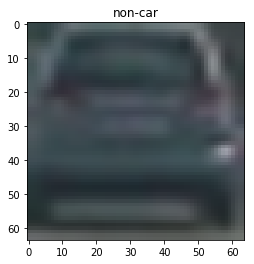

In [77]:
from keras.preprocessing import image

test_image = cv2.imread("train_data/car/GTI_Far/image0010.png")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
# print(test_image)
plt.title(cars_classifier_cnn.predict(test_image))
plt.show()

In [78]:
# def classify(file):
#     test_image = cv2.imread(file)
#     test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
#     prediction = cars_classifier_cnn.predict(test_image)
#     return prediction

# corrected_predictions = 0
# wrong_predictions = 0

# ######
# #### cars 
# ######
# print ( " Predicting CARS")
# for folder  in  sorted(glob.glob('train_data/car/*')):
#     print ( " Predicting CARS folder " + str(folder))
#     for file in glob.glob(folder+ "/*"):
#         prediction = classify(file)
#         if prediction == "car":
#             corrected_predictions +=1
#         else:
#             wrong_predictions +=1
#     print ("                                     ..... correct= {} , wrong={} "\
#            .format(corrected_predictions,wrong_predictions ))

# ######
# #### NON cars 
# ######
# print ( " ")
# print ( " Predicting NON CARS")
# for folder  in  sorted(glob.glob('train_data/non-car/*')):
#     print ( " Predicting NON CARS folder " + str(folder))
#     for file in glob.glob(folder + "/*"):
#         prediction = classify(file)
#         if prediction == "non-car":
#             corrected_predictions +=1
#         else:
#             wrong_predictions +=1
#     print ("                                     ..... correct= {} , wrong={} "\
#            .format(corrected_predictions,wrong_predictions ))

# print ( "*************************************************************")        
# print ( "** CONV NET ..... ")
# print ( "**    Corrected predictions {}".format(corrected_predictions))        
# print ( "**    Wrong     predictions {}".format(wrong_predictions))        
# print ( "*************************************************************")        



### SLIDING WINDOW COMPARISON CNN / SVM/ NEURAL NETWORK

In [79]:
class window_extractor:
    def __init__(self, image,               \
                 window_dimension=32,  \
                 x_start_stop=[None, None], \
                 y_start_stop=[350, None], \
                 x_overlap=0.5, y_overlap=0.5):
        
        self.image           = image
        self.xy_window       = (window_dimension, window_dimension)
        self.xy_overlap      = (x_overlap, y_overlap)
        self.x_start_stop    = x_start_stop
        self.y_start_stop    = y_start_stop
        
        # If x and/or y start/stop positions not defined, set to image size
        #     print (x_start_stop)
        if self.x_start_stop[0] == None:
            self.x_start_stop[0] = 0
        if self.x_start_stop[1] == None:
            self.x_start_stop[1] = self.image.shape[1]
        if self.y_start_stop[0] == None:
            self.y_start_stop[0] = 0
        if self.y_start_stop[1] == None:
            self.y_start_stop[1] = self.image.shape[0]

        # Compute the span of the region to be searched    
        self.xspan = self.x_start_stop[1] - self.x_start_stop[0]
        self.yspan = self.y_start_stop[1] - self.y_start_stop[0]
        
        # Compute the number of pixels per step in x/y
        self.nx_pix_per_step = np.int(self.xy_window[0]*(1 - self.xy_overlap[0]))
        self.ny_pix_per_step = np.int(self.xy_window[1]*(1 - self.xy_overlap[1]))
        
        # Compute the number of windows in x/y
        self.nx_buffer = np.int(self.xy_window[0]*(self.xy_overlap[0]))
        self.ny_buffer = np.int(self.xy_window[1]*(self.xy_overlap[1]))
        self.nx_windows = np.int((self.xspan-self.nx_buffer)/self.nx_pix_per_step) 
        self.ny_windows = np.int((self.yspan-self.ny_buffer)/self.ny_pix_per_step) 



    def get_windows(self):
        # Initialize a list to append window positions to
        self.window_list = []
        # Loop through finding x and y window positions
        # Note: you could vectorize this step, but in practice
        # you'll be considering windows one by one with your
        # classifier, so looping makes sense
        for ys in range(self.ny_windows):
            for xs in range(self.nx_windows):
                # Calculate window position
                startx = xs*self.nx_pix_per_step + self.x_start_stop[0]
                endx = startx + self.xy_window[0]
                starty = ys*self.ny_pix_per_step + self.y_start_stop[0]
                endy = starty + self.xy_window[1]
                # Append window position to list
                self.window_list.append([startx, starty, endx, endy])
        # Return the list of windows
        return self.window_list
    
    def draw_boxes(self,hot_windows, color=(0, 0, 255), thick=6):
        # Make a copy of the image
        imcopy = np.copy(self.image)
        tmp_window_list = hot_windows
        for bbox in tmp_window_list:
#             print ("bbox = " + str(bbox))
            # Draw a rectangle given bbox coordinates
            cv2.rectangle(imcopy, (bbox[0], bbox[1]),(bbox[2], bbox[3]), color, thick)
        # Return the image copy with boxes drawn
        return imcopy

    

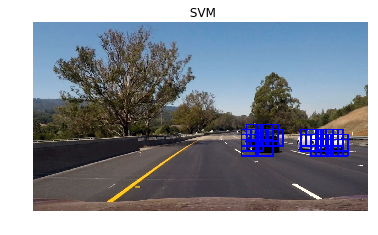

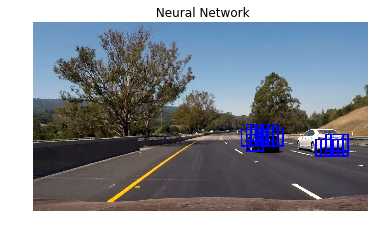

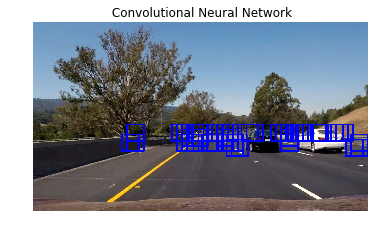

In [80]:
def test_comparison(filename, input_classifier):
    test_image = cv2.imread(filename)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    windows = []

    windows_ext = window_extractor(test_image, 
                                   window_dimension=64, 
                                   x_overlap = 0.7,
                                   y_overlap = 0.7,
                                   x_start_stop = [340,None],
                                   y_start_stop = [390,510])

    for x in windows_ext.get_windows():
         windows.append(x)

    hot_windows = []
    for window in windows:
        test_img = test_image[window[1]:window[3], window[0]:window[2]]
        test_img = cv2.resize(test_img, (64,64))
        
        if input_classifier.type == "CNN":
            prediction = input_classifier.predict(test_img)
            if prediction == "car":
                hot_windows.append(window)
        else:
            features         = extractor.get_all_features(test_img)
            features_reshaped = np.array(features).reshape(1, -1)
            test_features     = input_classifier.X_scaler.transform(np.array(features).reshape(1, -1))
            prediction        = input_classifier.clf.predict(test_features)

            if prediction >.9:
                hot_windows.append(window)

    tmp_image_hot = window_extractor(test_image).draw_boxes(hot_windows)
    
    return tmp_image_hot, hot_windows

test_file = "test_images2/image4.jpg"

### SVM
image_hot_svm, hot_windows_svm = test_comparison(test_file, cars_classifier_svm)

plt.imshow(image_hot_svm)
plt.axis("off")

plt.title(" SVM")
plt.show()

### HOG NN
image_hot_hog_nn , hot_windows_hog_nn = test_comparison(test_file, cars_classifier_hog_nn)
plt.imshow(image_hot_hog_nn)
plt.axis("off")

plt.title(" Neural Network")
plt.show()

### CNN
image_cnn,hot_windows_cnn  = test_comparison(test_file, cars_classifier_cnn)
plt.imshow(image_cnn)
plt.axis("off")
plt.title(" Convolutional Neural Network")
plt.show()


# plt.title(" Convolutional Neural Network ")


### Now defining the Heat map to include the recognized Car in a Box...


In [82]:
from scipy.ndimage.measurements import label

class heat_map:
    def __init__(self, boxes_list, image):
            self.boxes = boxes_list
            self.heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
            self.image = np.copy(image)
            
    
    def add_heat(self):
        for box in self.boxes :
            # Assuming each "box" takes the form [x1, y1, x2, y2]
            self.heatmap[box[1]:box[3], box[0]:box[2]] += 1

        # Return updated heatmap

    def apply_threshold(self,threshold):
        # Zero out pixels below the threshold
        self.heatmap[self.heatmap < threshold] = 0
        # Return thresholded map

    def draw_labeled_bboxes(self):
        #scipy.ndimage.measurements.label
        self.labels = label(self.heatmap)
        # Iterate through all detected cars
        self.boxes = []
        for car_number in range(1, self.labels[1]+1):
            # Find pixels with each car_number label value
            nonzero = (self.labels[0] == car_number).nonzero()
            # Identify x and y values of those pixels
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])
            # Define a bounding box based on min/max x and y
            bbox = ([np.min(nonzerox), np.min(nonzeroy),np.max(nonzerox), np.max(nonzeroy)])
            
            # Box discard - dimension that are improbable to  contain cars 
            if self.hot_boxes_discard(bbox) == True:
                pass
            else:
                # Draw the box on the image
                #                            x1       y1        x2       y2 
                cv2.rectangle(self.image, (bbox[0], bbox[1]),(bbox[2], bbox[3]), (0,255,0), 6)
                self.boxes.append(bbox)

    def hot_boxes_discard(self, box):
        ### discard hot boxes that are unlikely to contain a car because of false proportions
        box = np.copy(box).ravel()
        
        x_dimension = np.abs(box[2] - box[0])
        y_dimension = np.abs(box[3] - box[1])
        discard = False
        
        print ( "x_dimension = " + str(x_dimension) + " - y_dimension = " + str(y_dimension))
        print ("y_position1 = " + str(box[1]) + " - y_position2 = " + str(box[3]))
        if y_dimension > 0:
            ratio = x_dimension / y_dimension
            print (ratio )
            if ratio < 0.7 or ratio > 2:
                discard = True
        
        check = check_if_point_inside (img=img, 
                                       x_pos = box[0] ,    # --> x1 position 
                                       y_pos = box[1] ,    # --> y1 position 
                                       mask=vertices) == True
        if check == True:
            pass
        else:
            discard == True
            print (  " ********************")
            print (  " ********************")
            print (  " ***THE BOX IS OUTSIDE OF THE AREA OF INTEREST    **")
            print (  " ********************")
            print (  " ********************")

        
        if box[1]    > 400:           # y_position1 --> bottom down
            # BOX TOO SMALL Too small for the bottom part of the frame
            if y_dimension < 70 or x_dimension < 70:     
                print ( " discarded because too small " + str(y_dimension) + ","+str(x_dimension))
                discard=True

        return discard

#### Applying heatmap to SVM

x_dimension = 139 - y_dimension = 120
y_position1 = 390 - y_position2 = 510
1.15833333333
x_dimension = 177 - y_dimension = 101
y_position1 = 409 - y_position2 = 510
1.75247524752


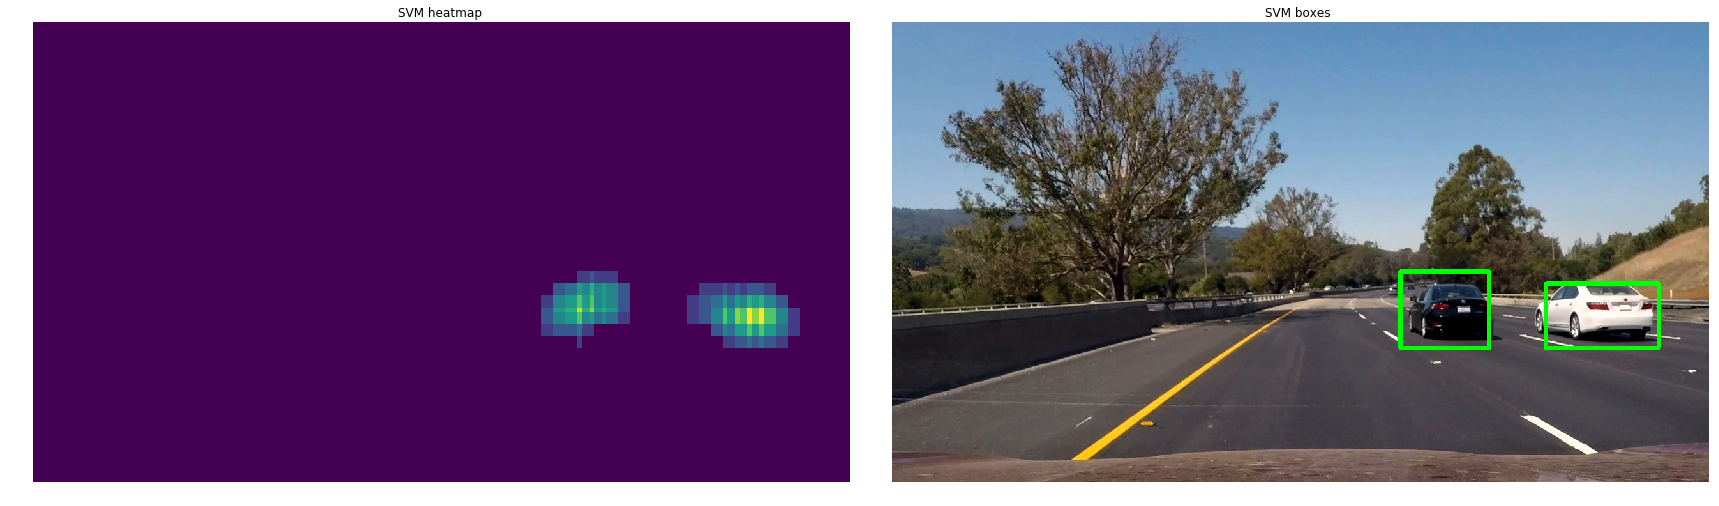

In [83]:
test_image = cv2.imread("test_images2/image4.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    
heat = heat_map(hot_windows_svm, test_image)
heat.add_heat()
heat.apply_threshold(threshold=np.average(heat.heatmap[heat.heatmap> 0 ])*.3)
heat.draw_labeled_bboxes()

#################
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(np.clip(heat.heatmap,0,255))    
ax1.set_title("SVM heatmap ")
ax1.axis('off')

ax2.imshow(heat.image)  
ax2.set_title("SVM boxes ")
ax2.axis('off')
##################
plt.show()



#### Applying heatmap to HOG Neural Network

x_dimension = 158 - y_dimension = 101
y_position1 = 390 - y_position2 = 491
1.56435643564
x_dimension = 120 - y_dimension = 82
y_position1 = 428 - y_position2 = 510
1.46341463415


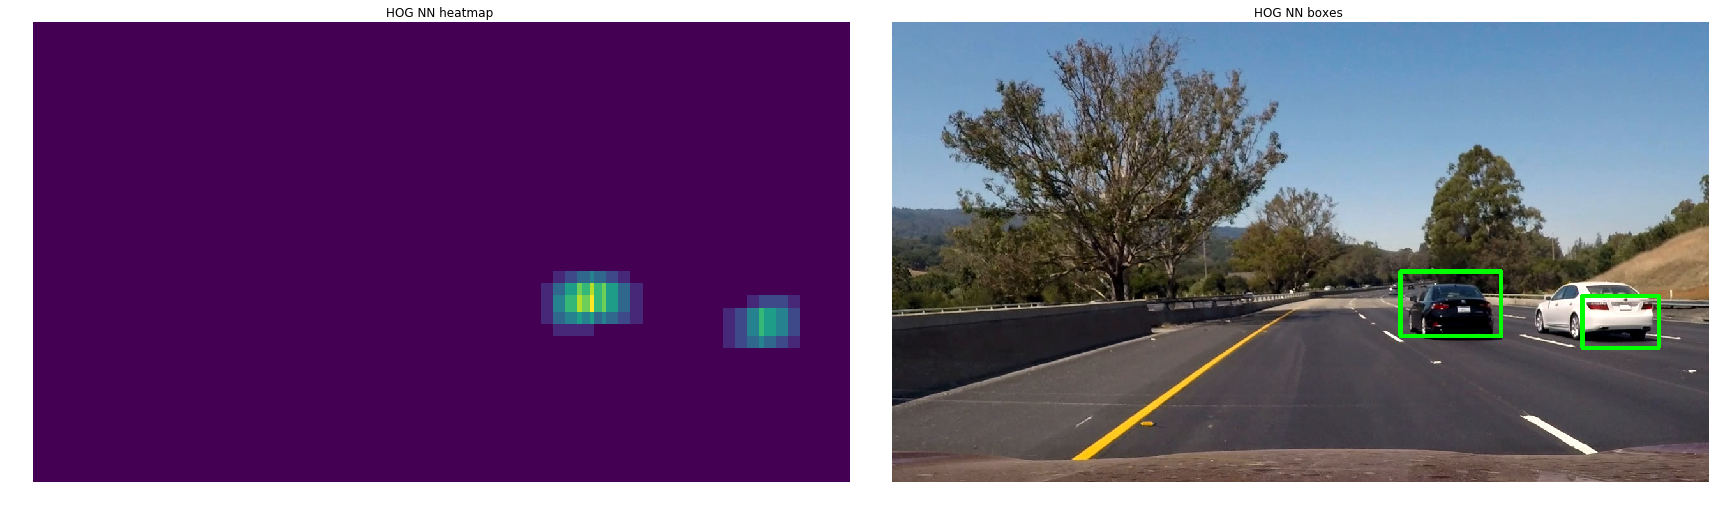

In [61]:
test_image = cv2.imread("test_images2/image4.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    
heat = heat_map(hot_windows_hog_nn, test_image)
heat.add_heat()
heat.apply_threshold(threshold=np.average(heat.heatmap[heat.heatmap> 0 ])*.3)
heat.draw_labeled_bboxes()

#################
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(np.clip(heat.heatmap,0,255))    
ax1.set_title("HOG NN heatmap ")
ax1.axis('off')

ax2.imshow(heat.image)  
ax2.set_title("HOG NN boxes ")
ax2.axis('off')
##################
plt.show()




#### Applying heatmap to Convolutional Neural Network

x_dimension = 82 - y_dimension = 101
y_position1 = 390 - y_position2 = 491
0.811881188119
x_dimension = 348 - y_dimension = 120
y_position1 = 390 - y_position2 = 510
2.9
x_dimension = 367 - y_dimension = 120
y_position1 = 390 - y_position2 = 510
3.05833333333


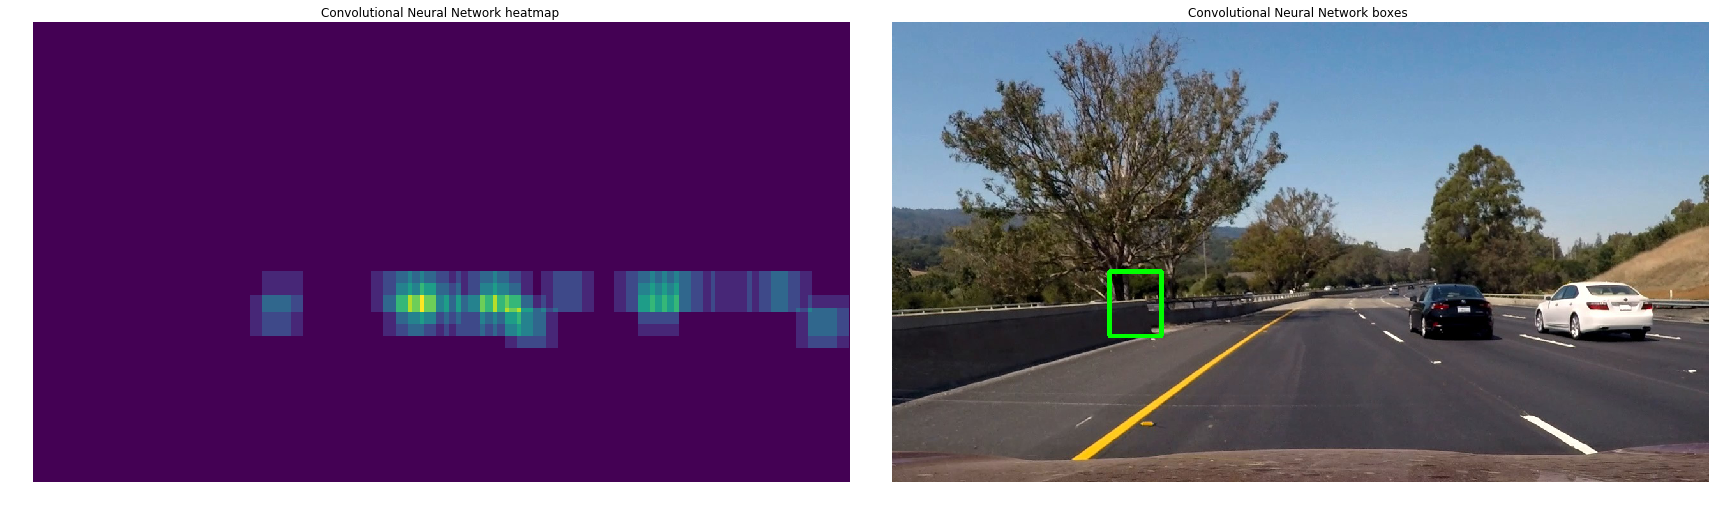

In [62]:
test_image = cv2.imread("test_images2/image4.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    
heat = heat_map(hot_windows_cnn, test_image)
heat.add_heat()
heat.apply_threshold(threshold=np.average(heat.heatmap[heat.heatmap> 0 ])*.2)
heat.draw_labeled_bboxes()

#################
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(np.clip(heat.heatmap,0,255))    
ax1.set_title("Convolutional Neural Network heatmap ")
ax1.axis('off')

ax2.imshow(heat.image)  
ax2.set_title("Convolutional Neural Network boxes ")
ax2.axis('off')
##################
plt.show()

### Defining the class pipeline

In [84]:
class pipeline:
    def __init__(self, extractor, cars_classifier, average_moltiplier, debug=False, debug_image=False):
        self.detector = image_car_detector(extractor)
        self.cars_classifier = cars_classifier
        self.cars_classifier.load_classifier()
        self.debug= debug
        self.boxes_history = []
        self.discarded = 0
        self.average_moltiplier = average_moltiplier
        self.debug_image = debug_image
        
    def insert_boxes_history(self, boxes):
        if len(boxes ) > 0:
            
            self.boxes_history.append(boxes)
            ### keeping only the last 3 fits
            self.boxes_history = self.boxes_history[-3:]

        
    def searchfor_windows_first(self):
            self.windows = []
            ##########  scale = 1
            windows_ext = window_extractor(self.image, 
                                           window_dimension=64, 
                                           x_overlap = 0.7,
                                           y_overlap = 0.7,
                                           x_start_stop = [340,None],
                                           y_start_stop = [390,510])
            
            for x in windows_ext.get_windows():
                 self.windows.append(x)

            ##########  scale = 1.25      
            windows_ext = window_extractor(image, 
                                           window_dimension=int(64*1.25), 
                                           x_overlap = 0.6,
                                           y_overlap = 0.8,
                                           x_start_stop = [340,None],
                                           y_start_stop = [400,560])
            for x in windows_ext.get_windows():
                 self.windows.append(x)


            # ###########  scale = 1.5     
            windows_ext = window_extractor(image, 
                                           window_dimension=int(64*1.5), 
                                           x_overlap = 0.6,
                                           y_overlap = 0.8,
                                           x_start_stop = [340,None],
                                           y_start_stop = [400,600])
            for x in windows_ext.get_windows():
                 self.windows.append(x)

        
            # ###########  scale = 1.75   
            windows_ext = window_extractor(image, 
                                           window_dimension=int(64*1.75), 
                                           x_overlap = 0.5,
                                           y_overlap = 0.8,
                                           x_start_stop = [340,None],
                                           y_start_stop = [400,656])
            for x in windows_ext.get_windows():
                 self.windows.append(x)

    def search_cars_by_steps(self,image):
        
        self.image = image 

        self.windows = []
        self.hot_windows = []
        
        ########
        # creating a list of boxes
        ########
        tmp_image = self.searchfor_windows_first()
        if self.debug_image:
            image_tmp = window_extractor(self.image).draw_boxes(self.windows)
            plt.imshow(image_tmp)    
            plt.axis("off")
            plt.title(" Boxes drawn on the image ")
            plt.show()

            

        ########
        # search for car detection in the above calculated boxes
        ########
        self.hot_windows = []
        self.hot_windows = self.detector.search_windows(self.image, self.windows, cars_classifier=self.cars_classifier)
        if self.debug_image:
            tmp_image_hot = window_extractor(self.image).draw_boxes(self.hot_windows)
            plt.imshow(tmp_image_hot)  
            plt.axis("off")
            plt.title(" Car boxes detected ")
            plt.show()

            
        ########
        # heat map
        ########
        self.heat = heat_map(self.hot_windows, self.image)
        self.heat.add_heat()
        if len(self.heat.heatmap[self.heat.heatmap>0]) > 0:
            self.heat.apply_threshold(threshold=
                                      np.average(self.heat.heatmap[self.heat.heatmap> 0 ])*
                                                 self.average_moltiplier)
        ########
        # discard unrealistic boxes
        ########
        number_of_boxes =  len(np.array(self.heat.boxes))   
        self.heat.boxes = np.array(self.heat.boxes).reshape(number_of_boxes,4)


        self.heat.draw_labeled_bboxes()
        if self.debug_image:
            plt.imshow(self.heat.image)    
            plt.axis("off")

            plt.title(" First heat map")

            plt.show()


        if self.debug:
            print ( " ")
            print (  " ------- actual self.heat.boxes = " )
            print (str(self.heat.boxes))

        
        self.insert_boxes_history(self.heat.boxes)
        
        #####################
        #### frame history averaging 
        #####################

        numbers_of_actual_boxes = len(self.heat.boxes)
        
        for i, box in enumerate(self.calc_history_average()):
            if self.debug:
                print ("*******************************")
            ## in case is missing I will append the history box
            if self.debug:
                print ( " i = " + str(i) + " numbers_of_actual_boxes = " + str(numbers_of_actual_boxes))
            if i +1 > numbers_of_actual_boxes:
                
                if self.debug: 
                    print ( " i +1 > numbers_of_actual_boxes ****** appending "+ str(box))
                    
                if numbers_of_actual_boxes == 0:
                    self.heat.boxes = [box]
#                     print ( " self.heat.boxes " + str(self.heat.boxes))
                else:
                    self.heat.boxes = np.vstack((self.heat.boxes,box))
                numbers_of_actual_boxes += 1
            if self.debug:print ("history box average i = " + str(i) )
            if self.debug:print ("   -->  avg.   = "  + str(box) )
            if self.debug:print ("   -->  actual = " + str(self.heat.boxes[i]))
            if self.debug:print ( "  -->  mean_squared_error = " + str(self.calc_RMSE(box , self.heat.boxes[i] )))
            
            # actual box substitution with average history boxes
            if self.calc_RMSE(box , self.heat.boxes[i] ) > 15.4 :
                print  (" *****")
                print ( " ***** Current frame discarded ")
                print  (" *****")

                self.discarded += 1
                self.heat.boxes[i] = box 
                
#         plt.show(self.heat.image)
#         plt.axis("off")
#         plt.imshow()
        
        ###########################
        return self.heat.image

    def calc_RMSE(self, vector1, vector2):
        sum_squared_diff = 0
        n = 0
        
        if self.debug:
            print (  " vector1 = " + str(vector1))
            print (  " vector2 = " + str(vector2))

        for element1, element2 in zip(vector1, vector2):
            n +=1
            sum_squared_diff += (element1 - element2) **2
        mean_squared_error_result = np.sqrt(sum_squared_diff / n)
        return mean_squared_error_result
            
    def put_zero_missing_history_elements(self):
        if self.debug:
            print (" -----------------------------")
            print (" ---- put_zero_missing_history_elements ----")
            print (" -----------------------------")
            print ( pipeline1.boxes_history)
            
        self.max_length = 0
        for boxes in pipeline1.boxes_history:
#             print ( "-----------------------------")
#             print (boxes)
            len_boxes = 0
            for row in boxes:
                if np.sum(row) > 0 :
                    len_boxes +=1
            if len_boxes > self.max_length:
                self.max_length = len_boxes
        if self.debug:print (" --")

        for i, boxes in enumerate(pipeline1.boxes_history):
            if self.debug:
                print ( " ----")
                print ( " ------ processing box " + str(i))
                print ( boxes)
                print ( " ----")
                print ( " ----")

            # excluding the eventual zero boxes 
            pipeline1.boxes_history[i] = pipeline1.boxes_history[i][:self.max_length]
            
            for to_add in range ( len(boxes), self.max_length):
               if self.debug:print ( " ** adding element to box " + str(i))
               pipeline1.boxes_history[i] = np.vstack((pipeline1.boxes_history[i], [0,0,0,0]))
                
        if self.debug:print ( pipeline1.boxes_history)
        if self.debug:print (" --")
        
    def calc_history_average(self):
        
        ### fill the missing elements with zero
        self.put_zero_missing_history_elements()
        
        boxes_sum = np.zeros((self.max_length,4))
        boxes_n = np.zeros((self.max_length,4))

        if self.debug:
            print (" _----------- ")
            print (pipeline1.boxes_history)
            print (" _----------- ")

        for element in np.array(pipeline1.boxes_history):
            if self.debug:print (element )
            if self.debug:print ("####")
            n = 0
            for i,box in enumerate(element):
                # avoid the average on missing elements
                if np.sum(box) == 0:
                    pass
                else:
                    boxes_n[i] += 1
                boxes_sum[i] += box

        return boxes_sum/boxes_n

    

### Convolutional Neural Network Test Images

 .. classifier loaded 
x_dimension = 893 - y_dimension = 190
y_position1 = 400 - y_position2 = 590
4.7


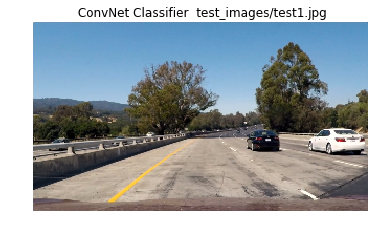

x_dimension = 223 - y_dimension = 171
y_position1 = 400 - y_position2 = 571
1.30409356725
x_dimension = 315 - y_dimension = 133
y_position1 = 400 - y_position2 = 533
2.36842105263
x_dimension = 6 - y_dimension = 63
y_position1 = 409 - y_position2 = 472
0.0952380952381
 discarded because too small 63,6
x_dimension = 323 - y_dimension = 124
y_position1 = 409 - y_position2 = 533
2.60483870968


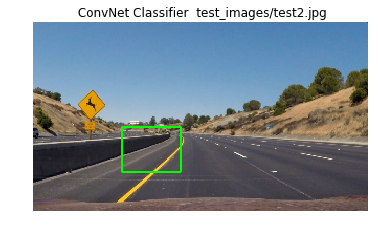

x_dimension = 427 - y_dimension = 231
y_position1 = 390 - y_position2 = 621
1.84848484848
x_dimension = 487 - y_dimension = 190
y_position1 = 400 - y_position2 = 590
2.56315789474
 *****
 ***** Current frame discarded 
 *****


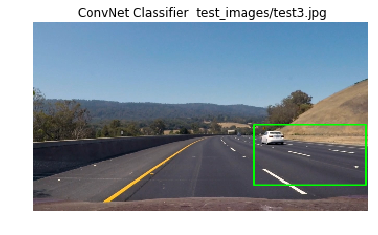

x_dimension = 503 - y_dimension = 190
y_position1 = 400 - y_position2 = 590
2.64736842105
x_dimension = 111 - y_dimension = 114
y_position1 = 400 - y_position2 = 514
0.973684210526
x_dimension = 1 - y_dimension = 42
y_position1 = 510 - y_position2 = 552
0.0238095238095
 discarded because too small 42,1
 *****
 ***** Current frame discarded 
 *****


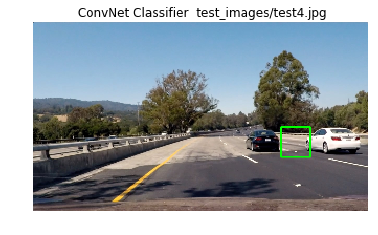

x_dimension = 855 - y_dimension = 190
y_position1 = 409 - y_position2 = 599
4.5
x_dimension = 6 - y_dimension = 23
y_position1 = 430 - y_position2 = 453
0.260869565217
 discarded because too small 23,6


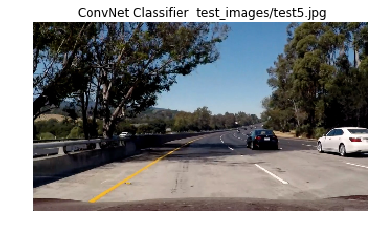

x_dimension = 513 - y_dimension = 231
y_position1 = 390 - y_position2 = 621
2.22077922078
x_dimension = 130 - y_dimension = 89
y_position1 = 390 - y_position2 = 479
1.4606741573
x_dimension = 6 - y_dimension = 63
y_position1 = 390 - y_position2 = 453
0.0952380952381
x_dimension = 25 - y_dimension = 63
y_position1 = 390 - y_position2 = 453
0.396825396825
x_dimension = 6 - y_dimension = 6
y_position1 = 447 - y_position2 = 453
1.0
 discarded because too small 6,6
x_dimension = 57 - y_dimension = 53
y_position1 = 457 - y_position2 = 510
1.07547169811
 discarded because too small 53,57
x_dimension = 87 - y_dimension = 92
y_position1 = 460 - y_position2 = 552
0.945652173913
 *****
 ***** Current frame discarded 
 *****


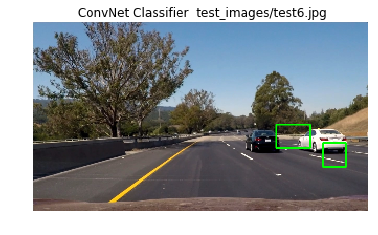

In [85]:
import cv2
import os

pipeline1 = pipeline(extractor, 
                     cars_classifier=cars_classifier_cnn,
                     average_moltiplier=0.6, 
                     debug=False, 
                     debug_image=False)

for image_name  in  sorted(glob.glob('test_images/*')):
    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_heat = pipeline1.search_cars_by_steps(image)
#     print ( " saving .. " + "output_images_cnn/"+ os.path.split(image_name)[-1])
    image_heat = cv2.resize(image_heat, (int(image.shape[1]/4), int(image.shape[0]/4 ) ))  
    cv2.imwrite("output_images_cnn/"+ os.path.split(image_name)[-1], cv2.cvtColor(image_heat, cv2.COLOR_RGB2BGR) )
    
    plt.title(" ConvNet Classifier  " + str(image_name))
    plt.axis("off")
    plt.imshow(image_heat)
    plt.show()


### SVM classifier + HOG Test Images

In [ ]:
import cv2
pipeline1 = pipeline(extractor, 
                     cars_classifier=cars_classifier_svm,
                     average_moltiplier=.2, 
                     debug=False, 
                     debug_image=False)

for image_name  in  sorted(glob.glob('test_images/*')):

    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_heat = pipeline1.search_cars_by_steps(image)
#     print ( " saving .. " + "output_images_svm/"+ os.path.split(image_name)[-1])
    image_heat = cv2.resize(image_heat, (int(image.shape[1]/4), int(image.shape[0]/4 ) ))  
    cv2.imwrite("output_images_svm/"+ os.path.split(image_name)[-1], cv2.cvtColor(image_heat, cv2.COLOR_RGB2BGR) )
    
    plt.title(" SVM classifier + HOG  " + str(image_name))
    plt.axis("off")
    plt.imshow(image_heat)
    plt.show()



### Neural Network classifier + HOG Test Images


In [ ]:
import cv2
pipeline1 = pipeline(extractor, 
                     cars_classifier=cars_classifier_hog_nn,
                     average_moltiplier=0.4, 
                     debug=False, 
                     debug_image=False)

for image_name  in  sorted(glob.glob('test_images/*')):
    image = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)
    image_heat = pipeline1.search_cars_by_steps(image)
#     print ( " saving .. " + "output_images_hog_nn/"+ os.path.split(image_name)[-1])
    image_heat = cv2.resize(image_heat, (int(image.shape[1]/4), int(image.shape[0]/4 ) ))  
    cv2.imwrite("output_images_hog_nn/"+ os.path.split(image_name)[-1], cv2.cvtColor(image_heat, cv2.COLOR_RGB2BGR) )

    plt.title(" Neural Network classifier + HOG" + str(image_name))
    plt.imshow(image_heat)
    plt.axis("off")
    plt.show()




### ConvNet on Test video

In [ ]:
pipeline1 = pipeline(extractor, 
                     cars_classifier=cars_classifier_cnn,
                     average_moltiplier=0.4, 
                     debug=False, 
                     debug_image=False)

from moviepy.editor import VideoFileClip
output_video_name = 'test_video_output.mp4'
clip1 = VideoFileClip("test_video.mp4")
clip2 = clip1.subclip(0,2)
output_video = clip2.fl_image(lambda x: pipeline1.search_cars_by_steps(x)) #NOTE: this function expects color images!!
%time output_video.write_videofile(output_video_name, audio=False)
print ("Completed")



### ConvNet on Project Video  - CONV NET

In [25]:
pipeline1 = pipeline(extractor, 
                     cars_classifier=cars_classifier_cnn,
                     average_moltiplier=0.7, 
                     debug=False, 
                     debug_image=False)

from moviepy.editor import VideoFileClip
output_video_name = 'project_video_output_cnn.mp4'
clip1 = VideoFileClip("project_video.mp4")
# clip2 = clip1.subclip(0,15)
output_video = clip1.fl_image(lambda x: pipeline1.search_cars_by_steps(x)) #NOTE: this function expects color images!!
%time output_video.write_videofile(output_video_name, audio=False,verbose=False)
print ("Completed")

 .. classifier loaded 


  7%|▋         | 88/1261 [00:56<12:14,  1.60it/s]

 discard because of ratio  0.396825396825


  7%|▋         | 91/1261 [00:58<12:03,  1.62it/s]

 discard because of ratio  0.396825396825


 11%|█         | 136/1261 [01:26<11:41,  1.60it/s]

 discard because of ratio  0.0952380952381


 11%|█         | 137/1261 [01:27<11:38,  1.61it/s]

 discard because of ratio  0.0952380952381


 13%|█▎        | 159/1261 [01:40<11:31,  1.59it/s]

 discard because of ratio  0.136363636364


 13%|█▎        | 169/1261 [01:47<11:19,  1.61it/s]

 discard because of ratio  0.136363636364


 13%|█▎        | 170/1261 [01:47<11:35,  1.57it/s]

 discard because of ratio  0.136363636364


 14%|█▎        | 171/1261 [01:48<11:27,  1.59it/s]

 discard because of ratio  0.136363636364


 14%|█▎        | 172/1261 [01:49<11:28,  1.58it/s]

 discard because of ratio  0.136363636364


 14%|█▎        | 173/1261 [01:49<11:24,  1.59it/s]

 discard because of ratio  0.136363636364


 15%|█▌        | 193/1261 [02:02<11:20,  1.57it/s]

 discard because of ratio  0.136363636364


 16%|█▌        | 199/1261 [02:05<10:59,  1.61it/s]

 discard because of ratio  0.396825396825


 16%|█▋        | 208/1261 [02:11<10:45,  1.63it/s]

 discard because of ratio  0.0952380952381


 17%|█▋        | 209/1261 [02:12<11:27,  1.53it/s]

 discard because of ratio  0.0952380952381


 17%|█▋        | 210/1261 [02:12<11:10,  1.57it/s]

 discard because of ratio  0.0952380952381


 17%|█▋        | 212/1261 [02:13<10:57,  1.60it/s]

 discard because of ratio  0.0952380952381


 17%|█▋        | 213/1261 [02:14<10:53,  1.60it/s]

 discard because of ratio  0.0952380952381


 17%|█▋        | 214/1261 [02:15<10:46,  1.62it/s]

 discard because of ratio  0.0952380952381


 17%|█▋        | 216/1261 [02:16<11:10,  1.56it/s]

 discard because of ratio  0.0952380952381


 17%|█▋        | 217/1261 [02:17<11:05,  1.57it/s]

 discard because of ratio  0.0952380952381


 17%|█▋        | 219/1261 [02:18<10:49,  1.60it/s]

 discard because of ratio  0.0952380952381


 18%|█▊        | 221/1261 [02:19<11:03,  1.57it/s]

 discard because of ratio  0.0952380952381


 18%|█▊        | 222/1261 [02:20<11:10,  1.55it/s]

 discard because of ratio  0.0952380952381
 discard because of ratio  0.396825396825
 discard because of ratio  0.136363636364


 18%|█▊        | 223/1261 [02:20<10:59,  1.57it/s]

 discard because of ratio  0.0952380952381


 18%|█▊        | 224/1261 [02:21<10:56,  1.58it/s]

 discard because of ratio  0.0952380952381


 19%|█▊        | 236/1261 [02:29<10:41,  1.60it/s]

 discard because of ratio  0.0952380952381


 19%|█▉        | 237/1261 [02:29<10:39,  1.60it/s]

 discard because of ratio  0.0952380952381


 19%|█▉        | 238/1261 [02:30<10:33,  1.62it/s]

 discard because of ratio  0.0952380952381


 19%|█▉        | 239/1261 [02:30<10:27,  1.63it/s]

 discard because of ratio  0.396825396825


 19%|█▉        | 240/1261 [02:31<10:30,  1.62it/s]

 discard because of ratio  0.0952380952381


 19%|█▉        | 241/1261 [02:32<10:57,  1.55it/s]

 discard because of ratio  0.0952380952381


 19%|█▉        | 242/1261 [02:32<10:43,  1.58it/s]

 discard because of ratio  0.136363636364


 20%|█▉        | 248/1261 [02:36<10:45,  1.57it/s]

 discard because of ratio  0.0952380952381


 22%|██▏       | 275/1261 [02:53<10:12,  1.61it/s]

 discard because of ratio  0.396825396825


 22%|██▏       | 282/1261 [02:57<10:17,  1.58it/s]

 discard because of ratio  0.396825396825


 22%|██▏       | 283/1261 [02:58<10:16,  1.59it/s]

 discard because of ratio  0.396825396825


 23%|██▎       | 284/1261 [02:58<10:09,  1.60it/s]

 discard because of ratio  0.396825396825


 23%|██▎       | 285/1261 [02:59<10:04,  1.61it/s]

 discard because of ratio  0.396825396825


 23%|██▎       | 286/1261 [03:00<10:24,  1.56it/s]

 discard because of ratio  0.396825396825


 23%|██▎       | 288/1261 [03:01<10:12,  1.59it/s]

 discard because of ratio  0.396825396825


 23%|██▎       | 289/1261 [03:02<10:04,  1.61it/s]

 discard because of ratio  0.396825396825


 23%|██▎       | 292/1261 [03:03<10:10,  1.59it/s]

 discard because of ratio  0.568181818182


 23%|██▎       | 293/1261 [03:04<10:19,  1.56it/s]

 discard because of ratio  0.568181818182


 23%|██▎       | 296/1261 [03:06<09:49,  1.64it/s]

 discard because of ratio  0.396825396825


 24%|██▎       | 298/1261 [03:07<09:54,  1.62it/s]

 discard because of ratio  0.396825396825


 24%|██▎       | 299/1261 [03:08<10:10,  1.58it/s]

 discard because of ratio  0.396825396825


 24%|██▍       | 300/1261 [03:08<10:08,  1.58it/s]

 discard because of ratio  0.396825396825


 24%|██▍       | 304/1261 [03:11<10:24,  1.53it/s]

 discard because of ratio  0.396825396825


 24%|██▍       | 305/1261 [03:12<10:11,  1.56it/s]

 discard because of ratio  0.396825396825


 24%|██▍       | 307/1261 [03:13<10:05,  1.58it/s]

 discard because of ratio  0.396825396825


 24%|██▍       | 308/1261 [03:14<09:54,  1.60it/s]

 discard because of ratio  0.568181818182


 25%|██▍       | 313/1261 [03:18<13:20,  1.18it/s]

 discard because of ratio  0.136363636364


 31%|███       | 392/1261 [04:14<10:30,  1.38it/s]

 discard because of ratio  0.136363636364


 34%|███▎      | 423/1261 [04:34<08:40,  1.61it/s]

 discard because of ratio  0.0952380952381


 34%|███▍      | 428/1261 [04:37<08:36,  1.61it/s]

 discard because of ratio  0.396825396825


 34%|███▍      | 429/1261 [04:38<08:37,  1.61it/s]

 discard because of ratio  0.396825396825


 34%|███▍      | 431/1261 [04:39<08:55,  1.55it/s]

 discard because of ratio  0.396825396825
 discard because of ratio  0.0952380952381


 46%|████▋     | 584/1261 [06:26<07:03,  1.60it/s]

 discard because of ratio  0.396825396825


 47%|████▋     | 588/1261 [06:29<07:02,  1.59it/s]

 discard because of ratio  0.0952380952381


 49%|████▉     | 617/1261 [06:47<06:37,  1.62it/s]

 discard because of ratio  0.0952380952381


 49%|████▉     | 618/1261 [06:48<06:49,  1.57it/s]

 discard because of ratio  0.0952380952381


 49%|████▉     | 622/1261 [06:50<06:37,  1.61it/s]

 discard because of ratio  0.396825396825


 49%|████▉     | 623/1261 [06:51<06:33,  1.62it/s]

 discard because of ratio  0.0952380952381


 50%|████▉     | 627/1261 [06:53<06:39,  1.59it/s]

 discard because of ratio  0.396825396825


 50%|████▉     | 629/1261 [06:54<06:37,  1.59it/s]

 discard because of ratio  0.396825396825


 50%|█████     | 636/1261 [06:59<06:21,  1.64it/s]

 discard because of ratio  0.0952380952381


 51%|█████     | 637/1261 [06:59<06:35,  1.58it/s]

 discard because of ratio  0.0952380952381


 51%|█████     | 640/1261 [07:01<06:32,  1.58it/s]

 discard because of ratio  0.396825396825


 51%|█████     | 644/1261 [07:04<06:36,  1.56it/s]

 discard because of ratio  0.396825396825


 51%|█████     | 645/1261 [07:05<06:28,  1.59it/s]

 discard because of ratio  0.396825396825


 51%|█████▏    | 647/1261 [07:06<06:23,  1.60it/s]

 discard because of ratio  0.396825396825


 51%|█████▏    | 648/1261 [07:06<06:17,  1.62it/s]

 discard because of ratio  0.396825396825


 51%|█████▏    | 649/1261 [07:07<06:15,  1.63it/s]

 discard because of ratio  0.0952380952381


 52%|█████▏    | 650/1261 [07:08<06:34,  1.55it/s]

 discard because of ratio  0.0952380952381


 52%|█████▏    | 651/1261 [07:08<06:27,  1.57it/s]

 discard because of ratio  0.0952380952381


 52%|█████▏    | 652/1261 [07:09<06:19,  1.60it/s]

 discard because of ratio  0.0952380952381


 52%|█████▏    | 653/1261 [07:09<06:16,  1.61it/s]

 discard because of ratio  0.396825396825


 52%|█████▏    | 654/1261 [07:10<06:18,  1.60it/s]

 discard because of ratio  0.396825396825


 52%|█████▏    | 656/1261 [07:11<06:18,  1.60it/s]

 discard because of ratio  0.396825396825


 52%|█████▏    | 657/1261 [07:12<06:14,  1.61it/s]

 discard because of ratio  0.396825396825


 52%|█████▏    | 660/1261 [07:14<06:12,  1.61it/s]

 discard because of ratio  0.0952380952381


 52%|█████▏    | 661/1261 [07:14<06:10,  1.62it/s]

 discard because of ratio  0.0952380952381


 52%|█████▏    | 662/1261 [07:15<06:10,  1.62it/s]

 discard because of ratio  0.0952380952381


 53%|█████▎    | 663/1261 [07:16<06:23,  1.56it/s]

 discard because of ratio  0.0952380952381


 53%|█████▎    | 666/1261 [07:18<06:10,  1.61it/s]

 discard because of ratio  0.0952380952381


 58%|█████▊    | 728/1261 [07:59<06:05,  1.46it/s]

 discard because of ratio  3.31707317073


 58%|█████▊    | 733/1261 [08:02<05:59,  1.47it/s]

 discard because of ratio  0.24


 58%|█████▊    | 734/1261 [08:03<05:50,  1.50it/s]

 discard because of ratio  0.24


 58%|█████▊    | 735/1261 [08:03<05:56,  1.48it/s]

 discard because of ratio  0.24


 58%|█████▊    | 736/1261 [08:04<05:47,  1.51it/s]

 discard because of ratio  0.24


 59%|█████▊    | 738/1261 [08:05<05:33,  1.57it/s]

 discard because of ratio  0.24


 59%|█████▊    | 739/1261 [08:06<05:33,  1.56it/s]

 discard because of ratio  0.24


 59%|█████▉    | 742/1261 [08:08<05:37,  1.54it/s]

 discard because of ratio  3.82178217822


 59%|█████▉    | 743/1261 [08:08<05:29,  1.57it/s]

 discard because of ratio  3.82178217822


 59%|█████▉    | 744/1261 [08:09<05:28,  1.57it/s]

 discard because of ratio  0.24


 59%|█████▉    | 745/1261 [08:10<05:23,  1.60it/s]

 discard because of ratio  0.24


 59%|█████▉    | 746/1261 [08:10<05:22,  1.60it/s]

 discard because of ratio  3.82178217822


 59%|█████▉    | 747/1261 [08:11<05:22,  1.59it/s]

 discard because of ratio  3.82178217822


 59%|█████▉    | 748/1261 [08:11<05:23,  1.59it/s]

 discard because of ratio  3.82178217822


 59%|█████▉    | 749/1261 [08:12<05:23,  1.58it/s]

 discard because of ratio  3.44554455446


 59%|█████▉    | 750/1261 [08:13<05:20,  1.59it/s]

 discard because of ratio  3.63366336634


 60%|█████▉    | 751/1261 [08:13<05:15,  1.61it/s]

 discard because of ratio  3.44554455446


 60%|█████▉    | 752/1261 [08:14<05:13,  1.62it/s]

 discard because of ratio  3.63366336634


 60%|█████▉    | 753/1261 [08:15<05:15,  1.61it/s]

 discard because of ratio  3.44554455446


 60%|█████▉    | 754/1261 [08:15<05:24,  1.56it/s]

 discard because of ratio  3.44554455446


 60%|█████▉    | 755/1261 [08:16<05:23,  1.56it/s]

 discard because of ratio  3.44554455446


 60%|█████▉    | 756/1261 [08:16<05:17,  1.59it/s]

 discard because of ratio  3.44554455446


 60%|██████    | 758/1261 [08:18<05:12,  1.61it/s]

 discard because of ratio  3.44554455446


 60%|██████    | 759/1261 [08:18<05:09,  1.62it/s]

 discard because of ratio  3.06930693069


 60%|██████    | 760/1261 [08:19<05:11,  1.61it/s]

 discard because of ratio  3.25742574257


 60%|██████    | 761/1261 [08:20<05:31,  1.51it/s]

 discard because of ratio  3.25742574257


 60%|██████    | 762/1261 [08:20<05:26,  1.53it/s]

 discard because of ratio  3.25742574257


 61%|██████    | 763/1261 [08:21<05:17,  1.57it/s]

 discard because of ratio  3.25742574257


 61%|██████    | 764/1261 [08:22<05:10,  1.60it/s]

 discard because of ratio  3.44554455446


 61%|██████    | 765/1261 [08:22<05:07,  1.61it/s]

 discard because of ratio  0.136363636364
 discard because of ratio  0.136363636364


 61%|██████    | 766/1261 [08:23<05:09,  1.60it/s]

 discard because of ratio  3.06930693069


 61%|██████    | 767/1261 [08:23<05:08,  1.60it/s]

 discard because of ratio  3.06930693069


 61%|██████    | 768/1261 [08:24<05:17,  1.55it/s]

 discard because of ratio  3.06930693069


 68%|██████▊   | 852/1261 [09:16<04:17,  1.59it/s]

 discard because of ratio  0.136363636364


 68%|██████▊   | 860/1261 [09:22<04:10,  1.60it/s]

 discard because of ratio  0.396825396825


 68%|██████▊   | 862/1261 [09:23<04:09,  1.60it/s]

 discard because of ratio  0.396825396825


 73%|███████▎  | 920/1261 [09:59<03:26,  1.65it/s]

 discard because of ratio  0.0952380952381


 73%|███████▎  | 921/1261 [09:59<03:30,  1.62it/s]

 discard because of ratio  0.0952380952381


 73%|███████▎  | 925/1261 [10:02<03:32,  1.58it/s]

 discard because of ratio  0.0952380952381


 74%|███████▎  | 927/1261 [10:03<03:32,  1.58it/s]

 discard because of ratio  3.06930693069


 74%|███████▍  | 932/1261 [10:06<03:23,  1.62it/s]

 discard because of ratio  0.24


 75%|███████▌  | 949/1261 [10:17<03:15,  1.60it/s]

 discard because of ratio  0.136363636364


 76%|███████▌  | 961/1261 [10:24<03:06,  1.61it/s]

 discard because of ratio  0.24


 77%|███████▋  | 969/1261 [10:29<03:03,  1.59it/s]

 discard because of ratio  0.136363636364


 78%|███████▊  | 979/1261 [10:36<02:55,  1.61it/s]

 discard because of ratio  0.568181818182


 78%|███████▊  | 980/1261 [10:36<02:53,  1.62it/s]

 discard because of ratio  0.568181818182


 78%|███████▊  | 981/1261 [10:37<02:52,  1.62it/s]

 discard because of ratio  0.568181818182


 78%|███████▊  | 982/1261 [10:38<02:52,  1.62it/s]

 discard because of ratio  0.568181818182


 78%|███████▊  | 983/1261 [10:38<02:52,  1.61it/s]

 discard because of ratio  0.568181818182


 78%|███████▊  | 984/1261 [10:39<02:50,  1.62it/s]

 discard because of ratio  0.0952380952381


 81%|████████  | 1024/1261 [11:04<02:33,  1.55it/s]

 discard because of ratio  0.568181818182


 81%|████████▏ | 1026/1261 [11:05<02:28,  1.58it/s]

 discard because of ratio  0.568181818182


 82%|████████▏ | 1028/1261 [11:07<02:25,  1.60it/s]

 discard because of ratio  0.396825396825


 82%|████████▏ | 1029/1261 [11:07<02:30,  1.54it/s]

 discard because of ratio  0.396825396825


 82%|████████▏ | 1030/1261 [11:08<02:30,  1.54it/s]

 discard because of ratio  0.0952380952381


 82%|████████▏ | 1031/1261 [11:09<02:28,  1.55it/s]

 discard because of ratio  0.136363636364


 82%|████████▏ | 1037/1261 [11:12<02:21,  1.59it/s]

 discard because of ratio  0.24


 82%|████████▏ | 1038/1261 [11:13<02:19,  1.60it/s]

 discard because of ratio  0.24


 82%|████████▏ | 1040/1261 [11:14<02:17,  1.61it/s]

 discard because of ratio  0.0952380952381
 discard because of ratio  0.0952380952381


 84%|████████▎ | 1053/1261 [11:22<02:11,  1.58it/s]

 discard because of ratio  0.24


 89%|████████▉ | 1121/1261 [12:09<01:37,  1.44it/s]

 discard because of ratio  0.136363636364


 90%|█████████ | 1137/1261 [12:20<01:20,  1.54it/s]

 discard because of ratio  0.24


 90%|█████████ | 1141/1261 [12:22<01:16,  1.56it/s]

 discard because of ratio  0.24


 91%|█████████ | 1144/1261 [12:24<01:15,  1.55it/s]

 discard because of ratio  0.24


 91%|█████████ | 1148/1261 [12:27<01:12,  1.55it/s]

 discard because of ratio  0.136363636364


 92%|█████████▏| 1164/1261 [12:37<01:00,  1.60it/s]

 discard because of ratio  0.396825396825


 98%|█████████▊| 1240/1261 [13:25<00:12,  1.64it/s]

 discard because of ratio  0.24


 99%|█████████▉| 1248/1261 [13:30<00:08,  1.56it/s]

 discard because of ratio  0.24


 99%|█████████▉| 1249/1261 [13:31<00:07,  1.58it/s]

 discard because of ratio  0.24


100%|█████████▉| 1257/1261 [13:36<00:02,  1.56it/s]

 discard because of ratio  0.0952380952381


100%|█████████▉| 1260/1261 [13:38<00:00,  1.57it/s]

 discard because of ratio  0.0952380952381


CPU times: user 29min 18s, sys: 2min 5s, total: 31min 23s
Wall time: 13min 39s
Completed


### ConvNet on Project Video  - SVM

In [31]:
pipeline1 = pipeline(extractor, 
                     cars_classifier=cars_classifier_svm,
                     average_moltiplier=1, 
                     debug=False, 
                     debug_image=False)

from moviepy.editor import VideoFileClip
output_video_name = 'project_video_output_svm.mp4'
clip1 = VideoFileClip("project_video.mp4")
clip2 = clip1.subclip(20,25)
output_video = clip2.fl_image(lambda x: pipeline1.search_cars_by_steps(x)) #NOTE: this function expects color images!!
%time output_video.write_videofile(output_video_name, audio=False)
print ("Completed")

 .. classifier loaded 
[MoviePy] >>>> Building video project_video_output_svm.mp4
[MoviePy] Writing video project_video_output_svm.mp4



 14%|█▍        | 18/126 [00:30<02:56,  1.63s/it]

 discard because of ratio  0.24



 18%|█▊        | 23/126 [00:41<03:25,  2.00s/it]

 discard because of ratio  0.568181818182



 21%|██▏       | 27/126 [00:47<02:48,  1.70s/it]

 discard because of ratio  0.24



 22%|██▏       | 28/126 [00:49<02:52,  1.76s/it]

 discard because of ratio  0.24



 27%|██▋       | 34/126 [01:00<02:34,  1.68s/it]

 discard because of ratio  0.396825396825



 28%|██▊       | 35/126 [01:01<02:28,  1.63s/it]

 discard because of ratio  0.136363636364



 29%|██▉       | 37/126 [01:05<02:32,  1.72s/it]

 discard because of ratio  0.568181818182



 37%|███▋      | 46/126 [01:21<02:40,  2.01s/it]

 discard because of ratio  0.568181818182



 37%|███▋      | 47/126 [01:23<02:46,  2.11s/it]

 discard because of ratio  0.568181818182



 67%|██████▋   | 84/126 [02:41<01:10,  1.68s/it]

 discard because of ratio  0.24



 67%|██████▋   | 85/126 [02:42<01:09,  1.70s/it]

 discard because of ratio  0.24



 81%|████████  | 102/126 [03:09<00:37,  1.58s/it]

 discard because of ratio  0.0952380952381



 85%|████████▍ | 107/126 [03:18<00:33,  1.79s/it]

 discard because of ratio  0.396825396825



 86%|████████▌ | 108/126 [03:20<00:33,  1.89s/it]

 discard because of ratio  0.396825396825



 87%|████████▋ | 109/126 [03:22<00:30,  1.81s/it]

 discard because of ratio  0.396825396825
 discard because of ratio  0.136363636364



 87%|████████▋ | 110/126 [03:23<00:28,  1.81s/it]

 discard because of ratio  0.136363636364



 90%|████████▉ | 113/126 [03:30<00:25,  1.99s/it]

 discard because of ratio  0.0952380952381



 94%|█████████▎| 118/126 [03:40<00:16,  2.12s/it]

 discard because of ratio  0.568181818182



 94%|█████████▍| 119/126 [03:42<00:13,  1.98s/it]

 discard because of ratio  0.136363636364
 discard because of ratio  0.136363636364



 96%|█████████▌| 121/126 [03:46<00:09,  1.98s/it]

 discard because of ratio  0.0952380952381



 98%|█████████▊| 124/126 [03:52<00:04,  2.01s/it]

 discard because of ratio  0.0952380952381



 99%|█████████▉| 125/126 [03:54<00:01,  1.98s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output_svm.mp4 

CPU times: user 3min 25s, sys: 6.19 s, total: 3min 32s
Wall time: 3min 56s
Completed


### ConvNet on Project Video  - HOG + Neural Networks

In [71]:
pipeline1 = pipeline(extractor, 
                     cars_classifier=cars_classifier_hog_nn,
                     average_moltiplier=.4, 
                     debug=False, 
                     debug_image=False)

from moviepy.editor import VideoFileClip
output_video_name = 'project_video_output_hog_nn.mp4'
clip1 = VideoFileClip("project_video.mp4")
clip2 = clip1.subclip(20,22)
output_video = clip2.fl_image(lambda x: pipeline1.search_cars_by_steps(x)) #NOTE: this function expects color images!!
%time output_video.write_videofile(output_video_name, audio=False)
print ("Completed")

 .. classifier loaded 
x_dimension = 117 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.48101265823
[MoviePy] >>>> Building video project_video_output_hog_nn.mp4
[MoviePy] Writing video project_video_output_hog_nn.mp4


  2%|▏         | 1/51 [00:05<04:24,  5.30s/it]

x_dimension = 117 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.48101265823


  4%|▍         | 2/51 [00:10<04:23,  5.38s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


  6%|▌         | 3/51 [00:16<04:18,  5.39s/it]

x_dimension = 117 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.48101265823


  8%|▊         | 4/51 [00:21<04:12,  5.36s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 10%|▉         | 5/51 [00:26<04:06,  5.35s/it]

x_dimension = 130 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.36842105263


 12%|█▏        | 6/51 [00:33<04:11,  5.59s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 14%|█▎        | 7/51 [00:38<04:02,  5.50s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 16%|█▌        | 8/51 [00:43<03:53,  5.42s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 18%|█▊        | 9/51 [00:48<03:45,  5.36s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 20%|█▉        | 10/51 [00:54<03:38,  5.33s/it]

x_dimension = 130 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.36842105263


 22%|██▏       | 11/51 [00:59<03:31,  5.29s/it]

x_dimension = 152 - y_dimension = 121
y_position1 = 390 - y_position2 = 511
1.25619834711


 24%|██▎       | 12/51 [01:04<03:26,  5.30s/it]

x_dimension = 130 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.36842105263


 25%|██▌       | 13/51 [01:09<03:20,  5.29s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 27%|██▋       | 14/51 [01:15<03:15,  5.28s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 29%|██▉       | 15/51 [01:20<03:09,  5.28s/it]

x_dimension = 114 - y_dimension = 91
y_position1 = 400 - y_position2 = 491
1.25274725275


 31%|███▏      | 16/51 [01:25<03:05,  5.30s/it]

x_dimension = 120 - y_dimension = 91
y_position1 = 400 - y_position2 = 491
1.31868131868


 33%|███▎      | 17/51 [01:30<02:59,  5.28s/it]

x_dimension = 136 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.43157894737


 35%|███▌      | 18/51 [01:36<02:55,  5.32s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 37%|███▋      | 19/51 [01:41<02:49,  5.31s/it]

x_dimension = 120 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.51898734177


 39%|███▉      | 20/51 [01:46<02:44,  5.29s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 41%|████      | 21/51 [01:52<02:38,  5.28s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 43%|████▎     | 22/51 [01:57<02:32,  5.27s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 45%|████▌     | 23/51 [02:02<02:29,  5.34s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474


 47%|████▋     | 24/51 [02:08<02:27,  5.47s/it]

x_dimension = 111 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.16842105263


 49%|████▉     | 25/51 [02:13<02:20,  5.42s/it]

x_dimension = 101 - y_dimension = 91
y_position1 = 400 - y_position2 = 491
1.10989010989


 51%|█████     | 26/51 [02:19<02:14,  5.39s/it]

x_dimension = 101 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.27848101266


 53%|█████▎    | 27/51 [02:24<02:08,  5.35s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474
x_dimension = 63 - y_dimension = 63
y_position1 = 447 - y_position2 = 510
1.0
 discarded because too small 63,63


 55%|█████▍    | 28/51 [02:29<02:02,  5.32s/it]

x_dimension = 120 - y_dimension = 105
y_position1 = 390 - y_position2 = 495
1.14285714286
x_dimension = 95 - y_dimension = 95
y_position1 = 419 - y_position2 = 514
1.0


 57%|█████▋    | 29/51 [02:35<01:56,  5.30s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474
x_dimension = 63 - y_dimension = 63
y_position1 = 447 - y_position2 = 510
1.0
 discarded because too small 63,63


 59%|█████▉    | 30/51 [02:40<01:51,  5.30s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474
x_dimension = 63 - y_dimension = 63
y_position1 = 447 - y_position2 = 510
1.0
 discarded because too small 63,63


 61%|██████    | 31/51 [02:45<01:45,  5.30s/it]

x_dimension = 101 - y_dimension = 94
y_position1 = 400 - y_position2 = 494
1.07446808511


 63%|██████▎   | 32/51 [02:50<01:40,  5.29s/it]

x_dimension = 117 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.23157894737
x_dimension = 82 - y_dimension = 63
y_position1 = 428 - y_position2 = 491
1.30158730159
 discarded because too small 63,82


 65%|██████▍   | 33/51 [02:56<01:35,  5.28s/it]

x_dimension = 127 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.33684210526
x_dimension = 63 - y_dimension = 63
y_position1 = 428 - y_position2 = 491
1.0
 discarded because too small 63,63


 67%|██████▋   | 34/51 [03:01<01:29,  5.28s/it]

x_dimension = 117 - y_dimension = 111
y_position1 = 400 - y_position2 = 511
1.05405405405
x_dimension = 95 - y_dimension = 127
y_position1 = 428 - y_position2 = 555
0.748031496063


 69%|██████▊   | 35/51 [03:06<01:24,  5.27s/it]

x_dimension = 101 - y_dimension = 110
y_position1 = 400 - y_position2 = 510
0.918181818182
x_dimension = 53 - y_dimension = 95
y_position1 = 495 - y_position2 = 590
0.557894736842
 discarded because too small 95,53
x_dimension = 55 - y_dimension = 89
y_position1 = 510 - y_position2 = 599
0.61797752809
 discarded because too small 89,55


 71%|███████   | 36/51 [03:11<01:19,  5.27s/it]

x_dimension = 111 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.16842105263
x_dimension = 95 - y_dimension = 102
y_position1 = 488 - y_position2 = 590
0.93137254902
 *****
 ***** Current frame discarded 
 *****


 73%|███████▎  | 37/51 [03:17<01:14,  5.30s/it]

x_dimension = 111 - y_dimension = 111
y_position1 = 400 - y_position2 = 511
1.0
x_dimension = 167 - y_dimension = 133
y_position1 = 510 - y_position2 = 643
1.25563909774
 *****
 ***** Current frame discarded 
 *****


 75%|███████▍  | 38/51 [03:22<01:09,  5.36s/it]

x_dimension = 111 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.16842105263


 76%|███████▋  | 39/51 [03:28<01:04,  5.36s/it]

x_dimension = 111 - y_dimension = 111
y_position1 = 400 - y_position2 = 511
1.0
x_dimension = 171 - y_dimension = 145
y_position1 = 476 - y_position2 = 621
1.17931034483


 78%|███████▊  | 40/51 [03:33<00:58,  5.34s/it]

x_dimension = 101 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.06315789474
x_dimension = 167 - y_dimension = 133
y_position1 = 488 - y_position2 = 621
1.25563909774


 80%|████████  | 41/51 [03:38<00:52,  5.30s/it]

x_dimension = 95 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.20253164557
x_dimension = 223 - y_dimension = 199
y_position1 = 422 - y_position2 = 621
1.12060301508
 *****
 ***** Current frame discarded 
 *****


 82%|████████▏ | 42/51 [03:44<00:48,  5.42s/it]

x_dimension = 95 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.20253164557
x_dimension = 201 - y_dimension = 133
y_position1 = 444 - y_position2 = 577
1.51127819549
 *****
 ***** Current frame discarded 
 *****


 84%|████████▍ | 43/51 [03:49<00:43,  5.38s/it]

x_dimension = 95 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.20253164557
x_dimension = 201 - y_dimension = 124
y_position1 = 447 - y_position2 = 571
1.62096774194


 86%|████████▋ | 44/51 [03:54<00:37,  5.35s/it]

x_dimension = 101 - y_dimension = 91
y_position1 = 400 - y_position2 = 491
1.10989010989
x_dimension = 223 - y_dimension = 142
y_position1 = 457 - y_position2 = 599
1.57042253521
 *****
 ***** Current frame discarded 
 *****


 88%|████████▊ | 45/51 [04:00<00:31,  5.33s/it]

x_dimension = 95 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.20253164557
x_dimension = 223 - y_dimension = 133
y_position1 = 466 - y_position2 = 599
1.67669172932


 90%|█████████ | 46/51 [04:05<00:26,  5.31s/it]

x_dimension = 95 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.20253164557
x_dimension = 133 - y_dimension = 123
y_position1 = 476 - y_position2 = 599
1.08130081301
 *****
 ***** Current frame discarded 
 *****


 92%|█████████▏| 47/51 [04:10<00:21,  5.30s/it]

x_dimension = 120 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.26315789474
x_dimension = 167 - y_dimension = 155
y_position1 = 488 - y_position2 = 643
1.07741935484
 *****
 ***** Current frame discarded 
 *****


 94%|█████████▍| 48/51 [04:16<00:15,  5.30s/it]

x_dimension = 101 - y_dimension = 95
y_position1 = 400 - y_position2 = 495
1.06315789474
x_dimension = 167 - y_dimension = 133
y_position1 = 510 - y_position2 = 643
1.25563909774


 96%|█████████▌| 49/51 [04:21<00:10,  5.33s/it]

x_dimension = 95 - y_dimension = 79
y_position1 = 400 - y_position2 = 479
1.20253164557


 98%|█████████▊| 50/51 [04:26<00:05,  5.32s/it]

x_dimension = 120 - y_dimension = 105
y_position1 = 390 - y_position2 = 495
1.14285714286
x_dimension = 111 - y_dimension = 111
y_position1 = 510 - y_position2 = 621
1.0


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output_hog_nn.mp4 

CPU times: user 4min 26s, sys: 7.45 s, total: 4min 34s
Wall time: 4min 28s
Completed
